In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
d1=pd.read_excel('cep1_dataset.xlsx')
d1

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [3]:
d1.shape

(303, 14)

In [4]:
d1.info()
#As we cam see, there is no missing value in our database, which is good. #
#We have numeric values for 13 parameters and only one (old peak ) is float␣
,!data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
/bin/bash: -c: line 0: syntax error near unexpected token `"type"'
/bin/bash: -c: line 0: `data("type")'


In [5]:
#Q 1a,b
#Another way to emanie whether we have any missing values is to use the␣
,!following code
d1.isna().sum()
#The result is clear there is not any missing value

/bin/bash: -c: line 0: syntax error near unexpected token `"code"'
/bin/bash: -c: line 0: `following("code")'


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
#Q1 a,b
d1.nunique(axis=0)
#this is a way to evaluate the unique values per parameter
#This is also a great way to already separate the data in numerical and␣categorical variables

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [8]:
#There are several issues that need to be adressed.
#First of all we need to check for outliers and also the variables"ca" and␣
# "thal" have different values assigned
##feature ‘ca’ ranges from 0–3, to the information project document. However df.nunique() has 5 values(0-4). So 4 will ne replaved by NA

In [9]:
d1.ca.value_counts()
#only 4 features with this mistake, very low number compared to 303 rows, so we can easily replace 4 with NAN

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [10]:
d1[d1["ca"]==4]

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
92    52    1   2       138   223    0        1      169      0      0.0   
158   58    1   1       125   220    0        1      144      0      0.4   
163   38    1   2       138   175    0        1      173      0      0.0   
164   38    1   2       138   175    0        1      173      0      0.0   
251   43    1   0       132   247    1        0      143      1      0.1   

     slope  ca  thal  target  
92       2   4     2       1  
158      1   4     3       1  
163      2   4     2       1  
164      2   4     2       1  
251      1   4     3       0

In [11]:
d1.loc[d1["ca"]==4, "ca"]=np.nan

In [12]:
d1["ca"].unique()

array([ 0.,  2.,  1.,  3., nan])

In [13]:
#Feature ‘thal’ has values 3=normal,6=fixed defect, 7=reversible defect however, df.nunique() listed 0–3,
#not only 4 values instead of 3 but laso different description. There are two values of ‘0’. So lets change them to NaN

In [14]:
d1.thal.value_counts()
#we need to do some work here, reassigned new numbers (the ones from project description and substitute 0 with NAN since it is only 2/303 samples.

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [16]:
d1.loc[d1["thal"]==0, "thal"]=np.nan


In [17]:
d1.loc[d1.thal==3, 'thal']=7

In [18]:
d1.loc[d1.thal==2, 'thal']=6

In [19]:
d1.loc[d1.thal==1, 'thal']=3

In [20]:
d1['thal'].unique()
# 1 -->3 , 2-->6, 3-->7

array([ 3.,  6.,  7., nan])

In [21]:
d1.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          5
thal        2
target      0
dtype: int64

In [22]:
#so we need to deal with the "ca" and "thal" that are NAN now, and we will replace them with median (mean will be a mistake here!)

In [23]:
d1=d1.fillna(d1.median())
d1.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [24]:
#Now we need to check for any duplicates

In [25]:
#Q1 a,b
d1.duplicated().sum()

1

In [26]:
d1[d1.duplicated() == True]

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
164   38    1   2       138   175    0        1      173      0      0.0   

     slope   ca  thal  target  
164      2  0.0   6.0       1

In [27]:
#Q1 a,b drop the duplicate
d1.drop_duplicates(inplace = True)
#In order to confirm that 1 duplicate has been removed we check the shape,indeed rows are 302 and not 303
d1.shape

(302, 14)

In [28]:
d1.describe()

age         sex          cp    trestbps        chol         fbs  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  246.500000    0.149007   
std      9.04797    0.466426    1.032044   17.563394   51.753489    0.356686   
min     29.00000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.00000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.50000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.00000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.00000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490  149.569536    0.327815    1.043046    1.397351    0.665563   
std      0.526027   22.903527    0.470196    1.161452    0.616274    0.935142   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.250000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  152.500000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    3.000000   

             thal      target  
count  302.000000  302.000000  
mean     6.208609    0.543046  
std      0.939813    0.498970  
min      3.000000    0.000000  
25%      6.000000    0.000000  
50%      6.000000    1.000000  
75%      7.000000    1.000000  
max      7.000000    1.000000

age            Axes(0.125,0.53;0.0945122x0.35)
sex         Axes(0.238415,0.53;0.0945122x0.35)
cp          Axes(0.351829,0.53;0.0945122x0.35)
trestbps    Axes(0.465244,0.53;0.0945122x0.35)
chol        Axes(0.578659,0.53;0.0945122x0.35)
fbs         Axes(0.692073,0.53;0.0945122x0.35)
restecg     Axes(0.805488,0.53;0.0945122x0.35)
thalach        Axes(0.125,0.11;0.0945122x0.35)
exang       Axes(0.238415,0.11;0.0945122x0.35)
oldpeak     Axes(0.351829,0.11;0.0945122x0.35)
slope       Axes(0.465244,0.11;0.0945122x0.35)
ca          Axes(0.578659,0.11;0.0945122x0.35)
thal        Axes(0.692073,0.11;0.0945122x0.35)
target      Axes(0.805488,0.11;0.0945122x0.35)
dtype: object

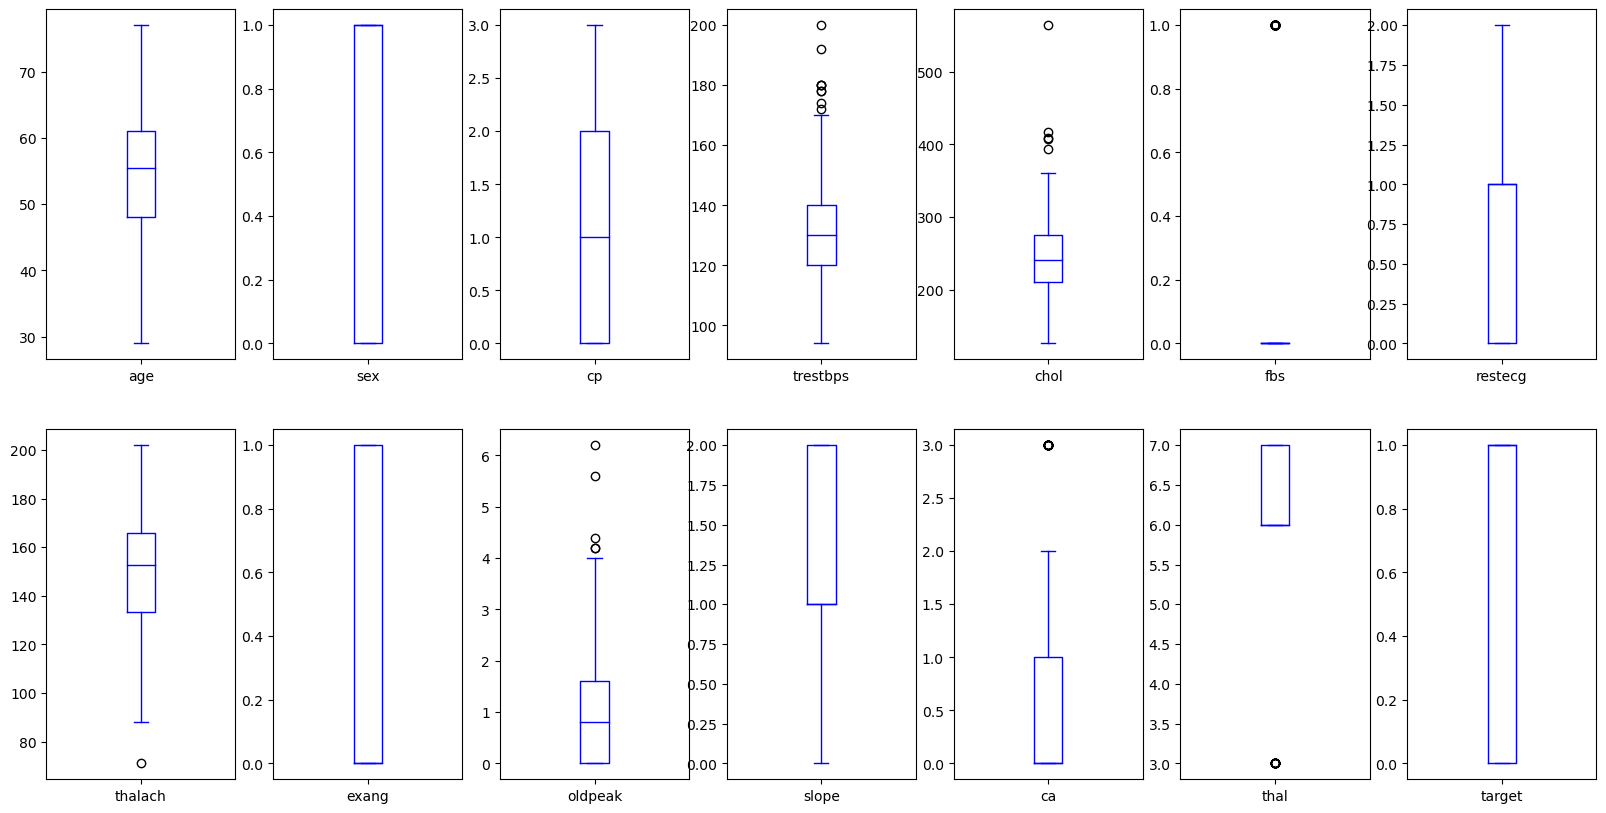

In [29]:
#We need to find if there are any outliers in the data, and then keep that in mind for the built model!
d1.plot(kind='box', subplots=True, layout=(2,7),
sharex=False,sharey=False, figsize=(20, 10),
color='blue')
#It seems that "trestbps,chol,oldpeak" have outliers

In [30]:
skewvalue=d1.skew(axis=0, skipna=True)
skewvalue

age        -0.203743
sex        -0.786120
cp          0.493022
trestbps    0.716541
chol        1.147332
fbs         1.981201
restecg     0.169467
thalach    -0.532671
exang       0.737281
oldpeak     1.266173
slope      -0.503247
ca          1.203952
thal       -2.168086
target     -0.173691
dtype: float64

In [31]:
#By checking the skewness is a way to check the distribution. Values between -0,5 till 0,5 are fairly symmetrical
#values close to 0 are more symmetrical and values<-1 or values>1 are highly assymetrical like ca, fbs, thal,oldpeak, chol

In [32]:
correlation=d1.corr()
correlation

age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.094962 -0.063107  0.283121  0.207216  0.119492   
sex      -0.094962  1.000000 -0.051740 -0.057647 -0.195571  0.046022   
cp       -0.063107 -0.051740  1.000000  0.046486 -0.072682  0.096018   
trestbps  0.283121 -0.057647  0.046486  1.000000  0.125256  0.178125   
chol      0.207216 -0.195571 -0.072682  0.125256  1.000000  0.011428   
fbs       0.119492  0.046022  0.096018  0.178125  0.011428  1.000000   
restecg  -0.111590 -0.060351  0.041561 -0.115367 -0.147602 -0.083081   
thalach  -0.395235 -0.046439  0.293367 -0.048023 -0.005308 -0.007169   
exang     0.093216  0.143460 -0.392937  0.068526  0.064099  0.024729   
oldpeak   0.206040  0.098322 -0.146692  0.194600  0.050086  0.004514   
slope    -0.164124 -0.032990  0.116854 -0.122873  0.000417 -0.058654   
ca        0.367313  0.082978 -0.226091  0.101516  0.126755  0.139938   
thal      0.008012  0.060832 -0.067496 -0.000597  0.101126 -0.053393   
target   -0.221476 -0.283609  0.432080 -0.146269 -0.081437 -0.026826   

           restecg   thalach     exang   oldpeak     slope        ca  \
age      -0.111590 -0.395235  0.093216  0.206040 -0.164124  0.367313   
sex      -0.060351 -0.046439  0.143460  0.098322 -0.032990  0.082978   
cp        0.041561  0.293367 -0.392937 -0.146692  0.116854 -0.226091   
trestbps -0.115367 -0.048023  0.068526  0.194600 -0.122873  0.101516   
chol     -0.147602 -0.005308  0.064099  0.050086  0.000417  0.126755   
fbs      -0.083081 -0.007169  0.024729  0.004514 -0.058654  0.139938   
restecg   1.000000  0.041210 -0.068807 -0.056251  0.090402 -0.113629   
thalach   0.041210  1.000000 -0.377411 -0.342201  0.384754 -0.264855   
exang    -0.068807 -0.377411  1.000000  0.286766 -0.256106  0.144385   
oldpeak  -0.056251 -0.342201  0.286766  1.000000 -0.576314  0.299605   
slope     0.090402  0.384754 -0.256106 -0.576314  1.000000 -0.108767   
ca       -0.113629 -0.264855  0.144385  0.299605 -0.108767  1.000000   
thal     -0.001135  0.009742  0.107869  0.077272  0.028491  0.045625   
target    0.134874  0.419955 -0.435601 -0.429146  0.343940 -0.463886   

              thal    target  
age       0.008012 -0.221476  
sex       0.060832 -0.283609  
cp       -0.067496  0.432080  
trestbps -0.000597 -0.146269  
chol      0.101126 -0.081437  
fbs      -0.053393 -0.026826  
restecg  -0.001135  0.134874  
thalach   0.009742  0.419955  
exang     0.107869 -0.435601  
oldpeak   0.077272 -0.429146  
slope     0.028491  0.343940  
ca        0.045625 -0.463886  
thal      1.000000 -0.171533  
target   -0.171533  1.000000

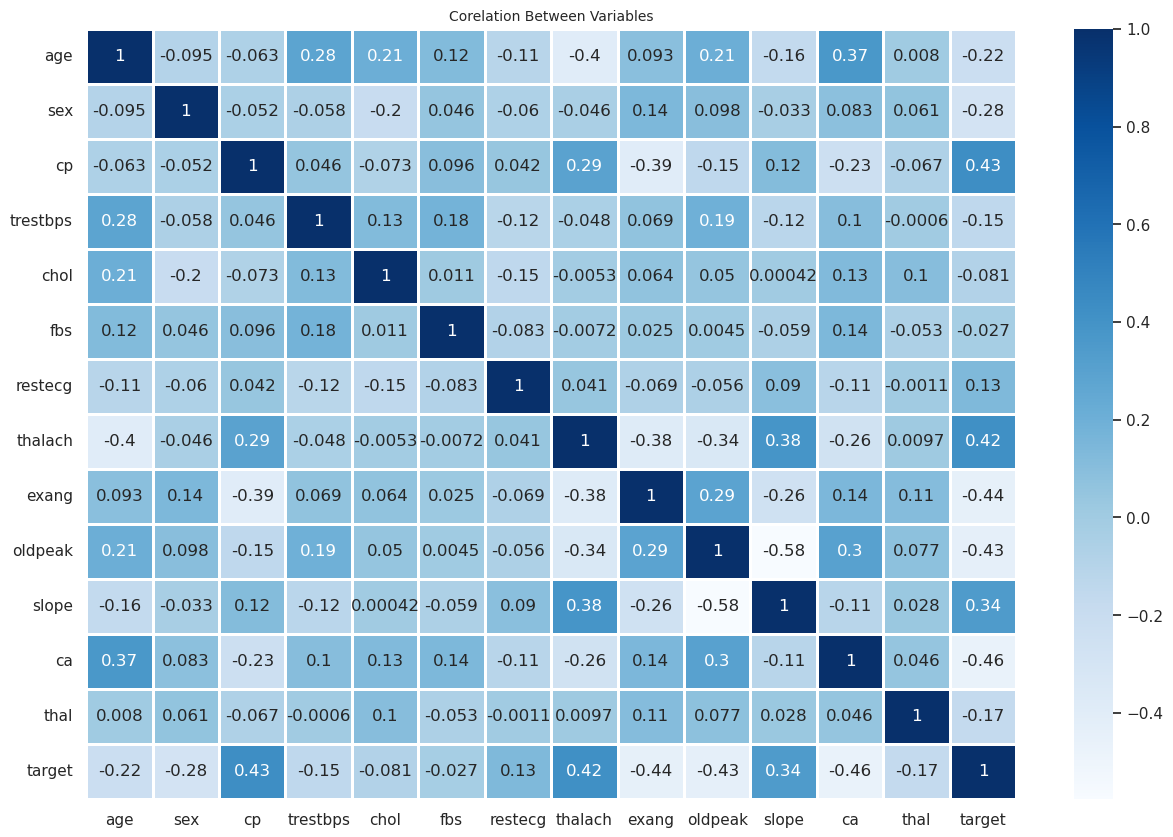

In [33]:
sns.set(style="white")
plt.figure (figsize=(15, 10) )
sns.heatmap(data=correlation, annot = True, linewidths=1, cmap="Blues")
plt.title('Corelation Between Variables', fontsize = 10)
plt.show()

In [34]:
d2=d1.drop('target', axis=1)
d2

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope   ca  thal  
0        0  0.0   3.0  
1        0  0.0   6.0  
2        2  0.0   6.0  
3        2  0.0   6.0  
4        2  0.0   6.0  
..     ...  ...   ...  
298      1  0.0   7.0  
299      1  0.0   7.0  
300      1  2.0   7.0  
301      1  1.0   7.0  
302      1  1.0   6.0  

[302 rows x 13 columns]

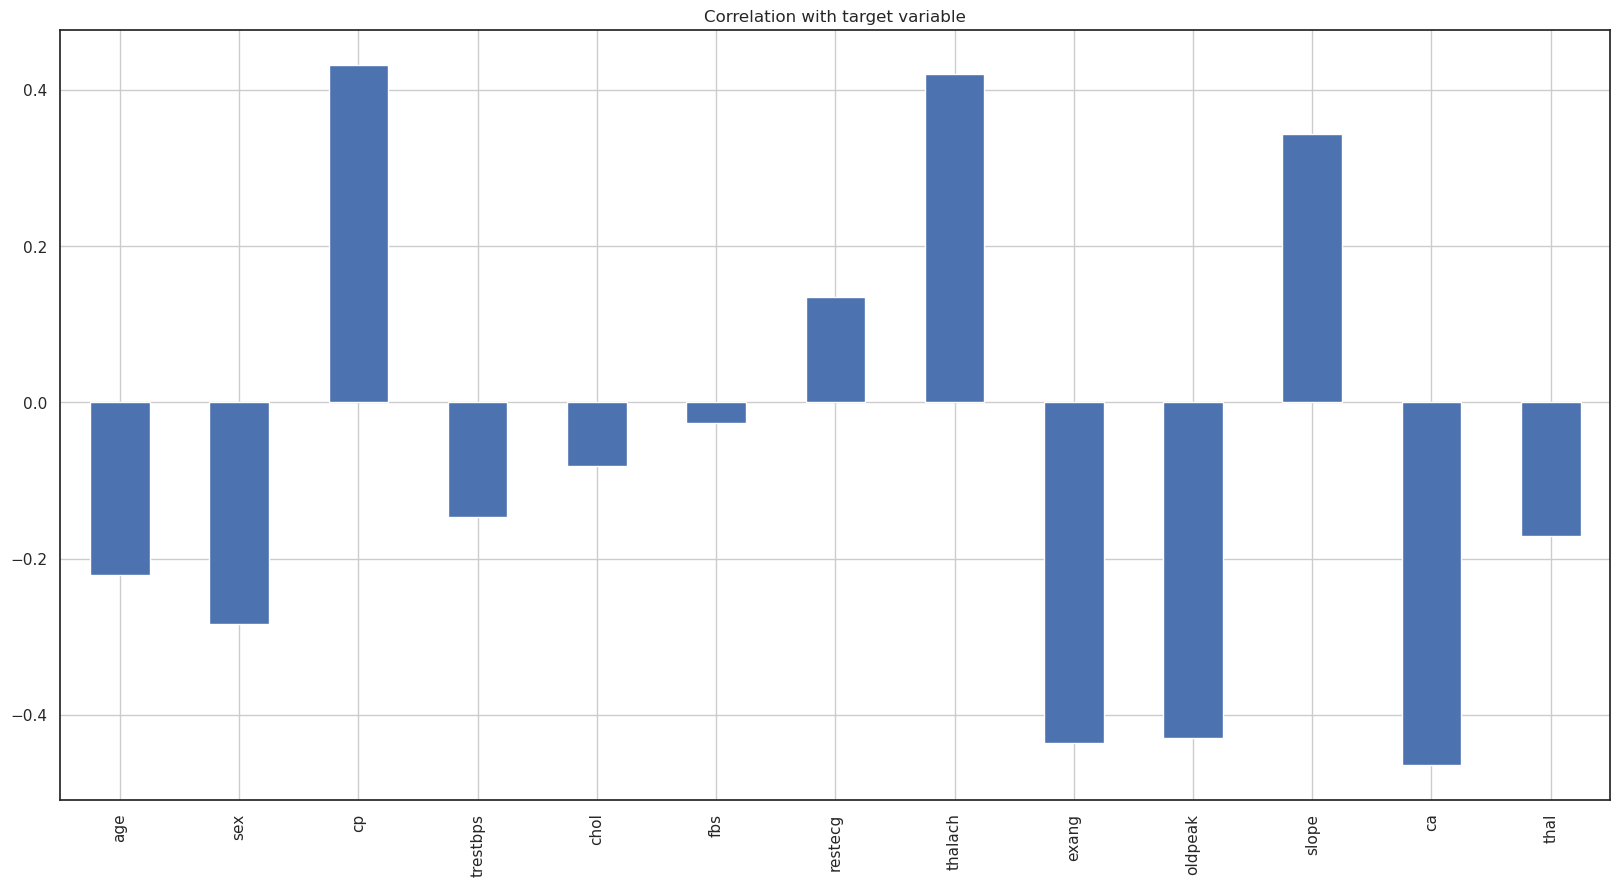

In [35]:
#Q2a --> furthermore this approach answers about central tendencies and spread of the data
d2.corrwith(d1.target).plot(kind='bar', grid=True, figsize=(20, 10),title="Correlation with target variable")
plt.show()
#variables like 'cp','restecg','thalach' and 'slope' are positevely corellated␣with the 'target' feature. The rest are neagtively corellated.
#I used from another source this code

In [36]:
#Q2 b. Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot
numerical=d2.drop(['thal','ca','exang','slope', 'fbs','cp','sex', 'restecg'],axis=1)
numerical

age  trestbps  chol  thalach  oldpeak
0     63       145   233      150      2.3
1     37       130   250      187      3.5
2     41       130   204      172      1.4
3     56       120   236      178      0.8
4     57       120   354      163      0.6
..   ...       ...   ...      ...      ...
298   57       140   241      123      0.2
299   45       110   264      132      1.2
300   68       144   193      141      3.4
301   57       130   131      115      1.2
302   57       130   236      174      0.0

[302 rows x 5 columns]

In [37]:
categorical = d2[['thal','ca','exang','slope', 'fbs','cp','sex', 'restecg']].copy()
categorical

thal   ca  exang  slope  fbs  cp  sex  restecg
0     3.0  0.0      0      0    1   3    1        0
1     6.0  0.0      0      0    0   2    1        1
2     6.0  0.0      0      2    0   1    0        0
3     6.0  0.0      0      2    0   1    1        1
4     6.0  0.0      1      2    0   0    0        1
..    ...  ...    ...    ...  ...  ..  ...      ...
298   7.0  0.0      1      1    0   0    0        1
299   7.0  0.0      0      1    0   3    1        1
300   7.0  2.0      0      1    1   0    1        1
301   7.0  1.0      1      1    0   0    1        1
302   6.0  1.0      0      1    0   1    0        0

[302 rows x 8 columns]

<Axes: xlabel='count', ylabel='thal'>

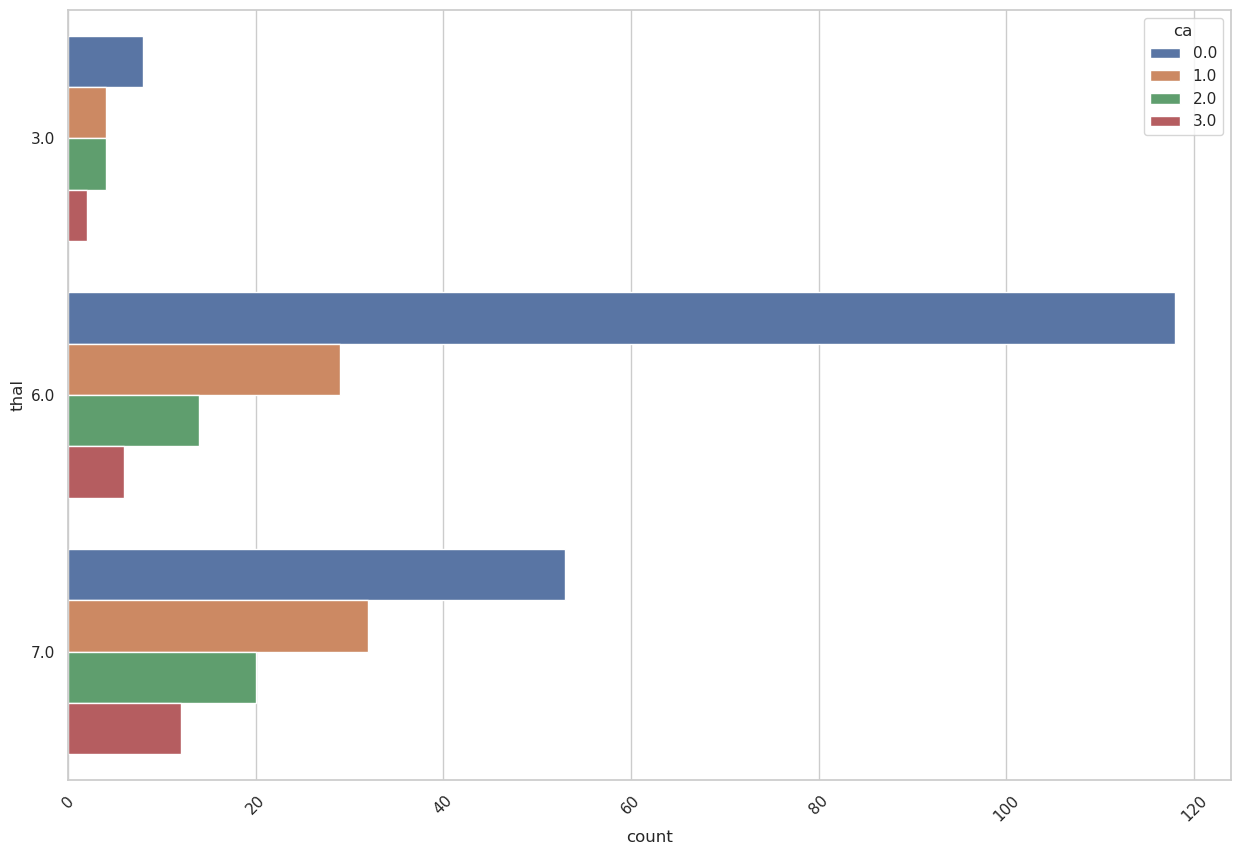

In [38]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
sns.countplot(data=categorical, y="thal", hue="ca")

<Axes: xlabel='count', ylabel='thal'>

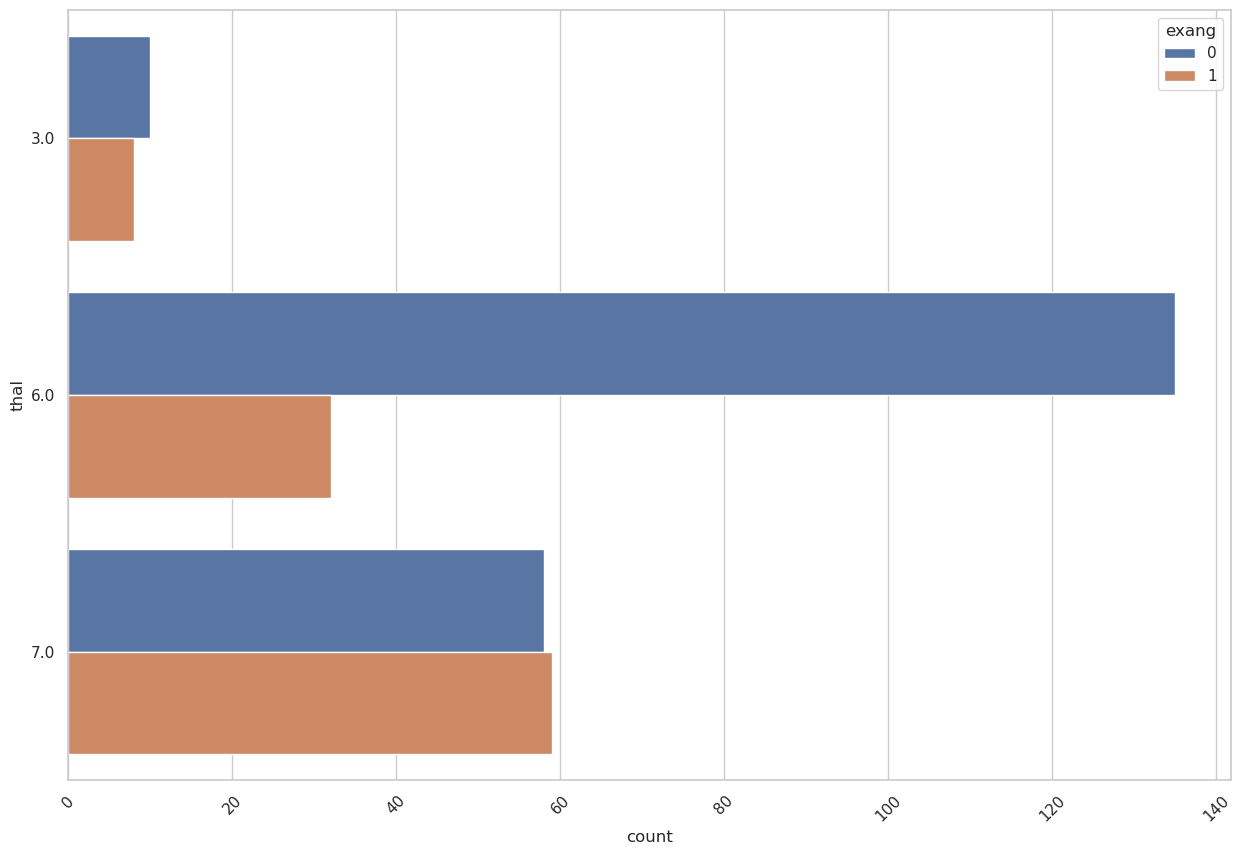

In [39]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
sns.countplot(data=categorical, y="thal", hue="exang")

<Axes: xlabel='count', ylabel='thal'>

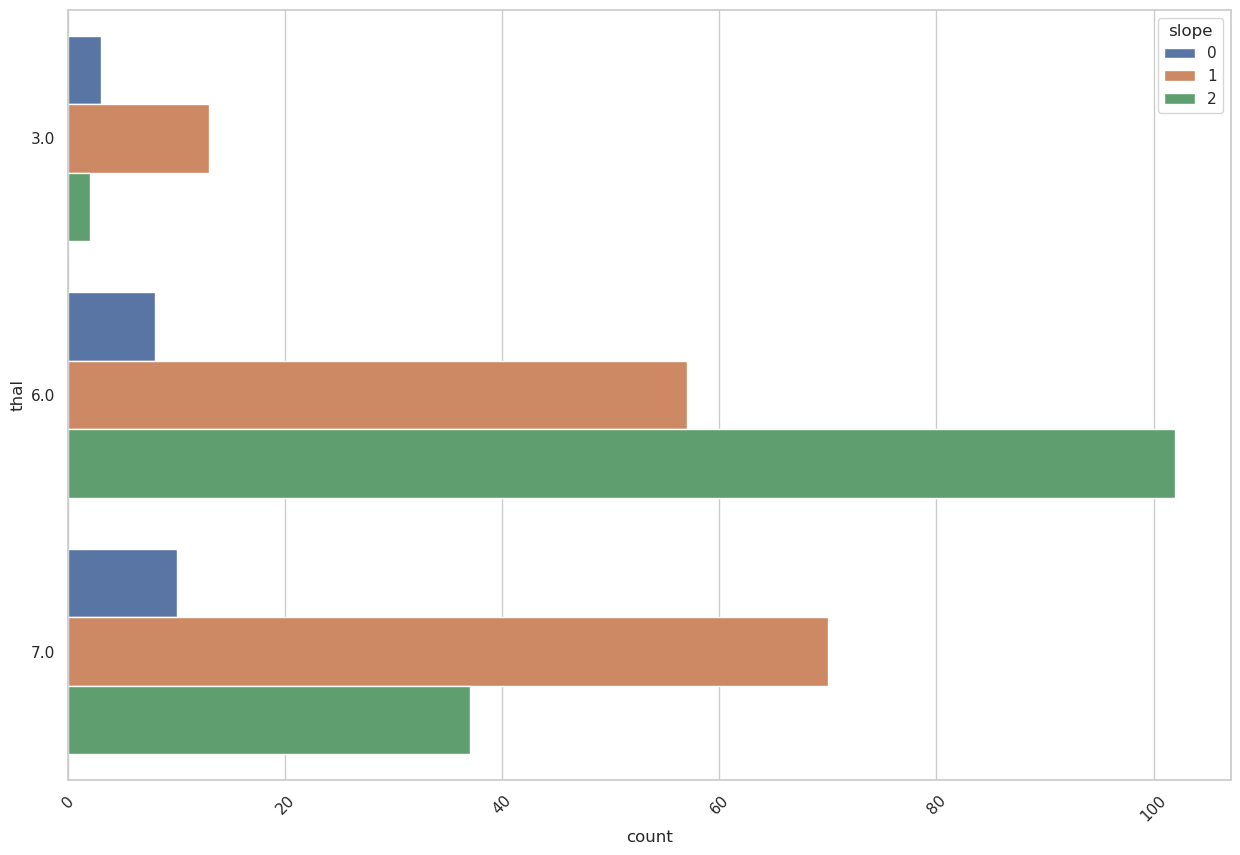

In [40]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
sns.countplot(data=categorical, y="thal", hue="slope")

<Axes: xlabel='count', ylabel='thal'>

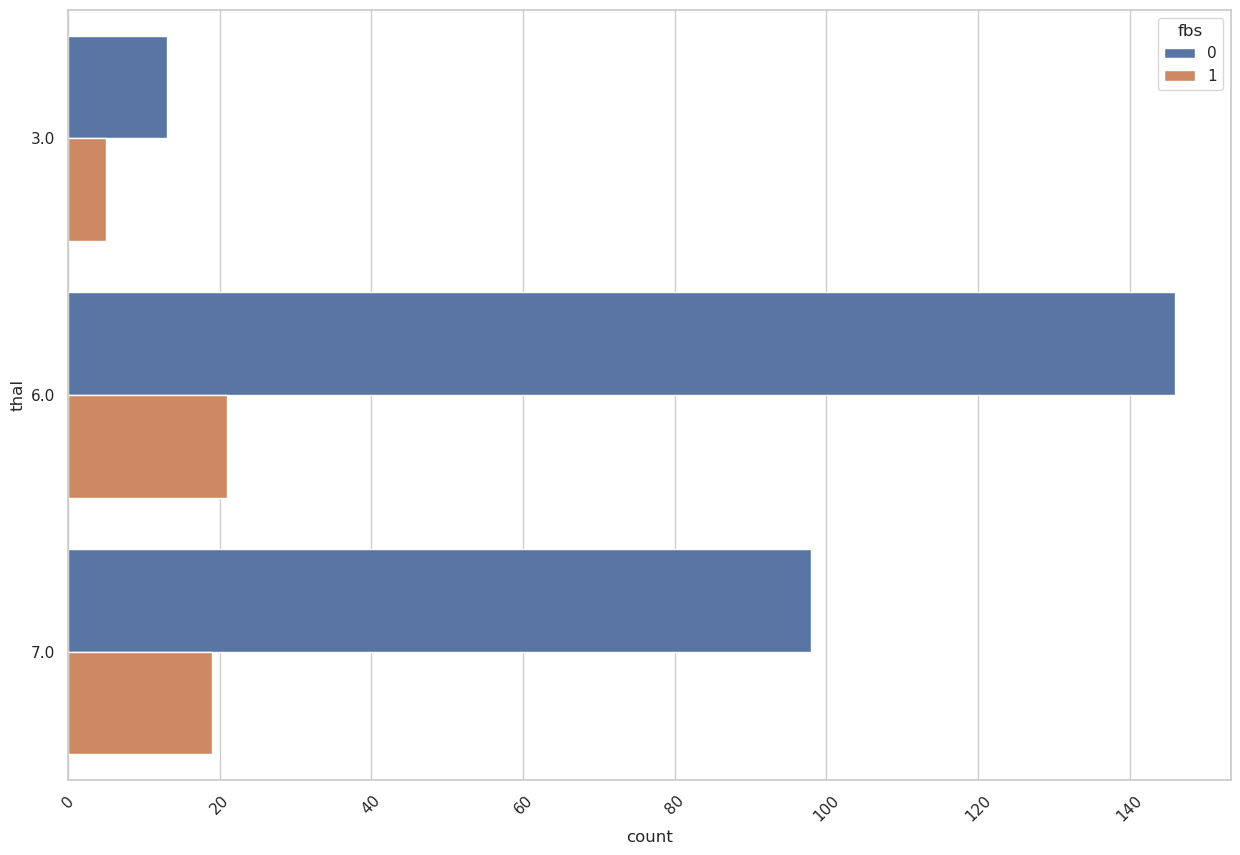

In [41]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
sns.countplot(data=categorical, y="thal",hue="fbs")

<Axes: xlabel='count', ylabel='thal'>

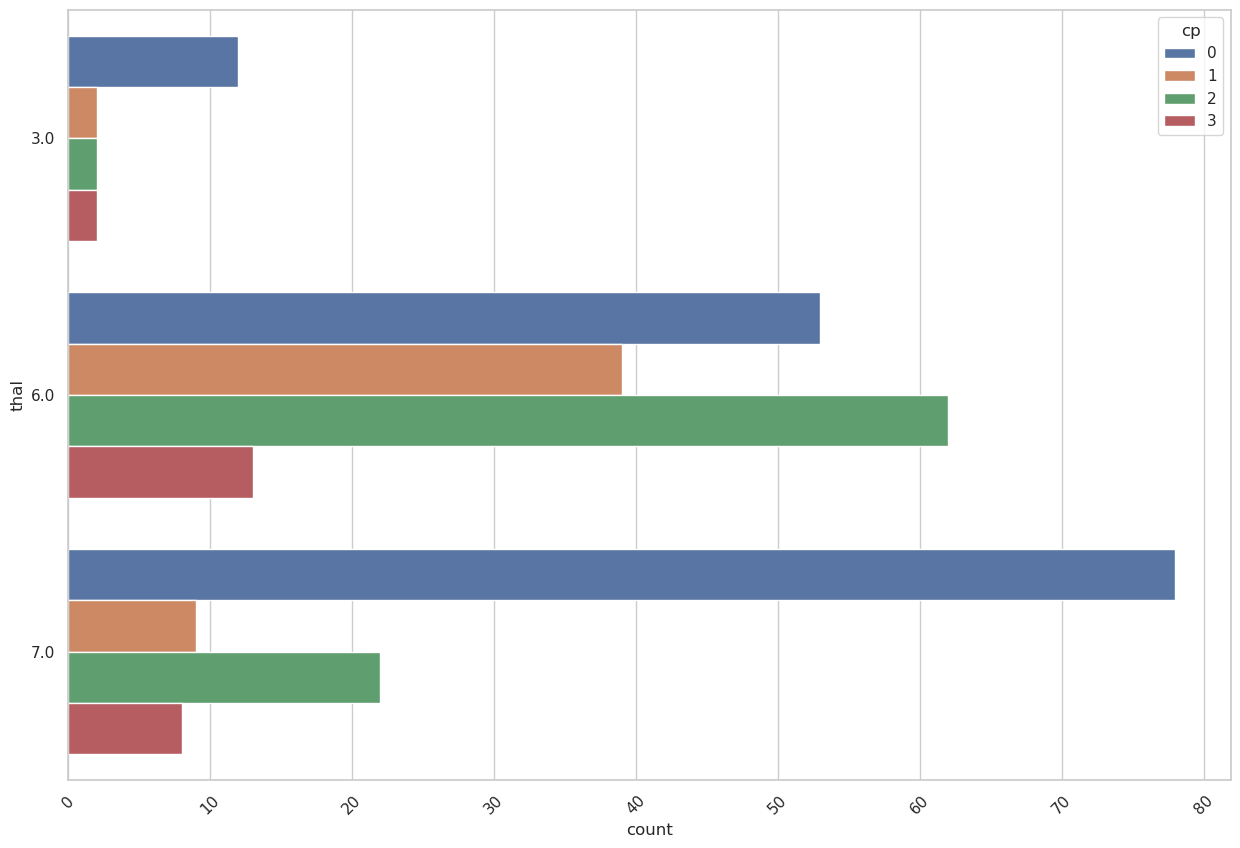

In [42]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
sns.countplot(data=categorical, y="thal",hue="cp")

<Axes: xlabel='count', ylabel='thal'>

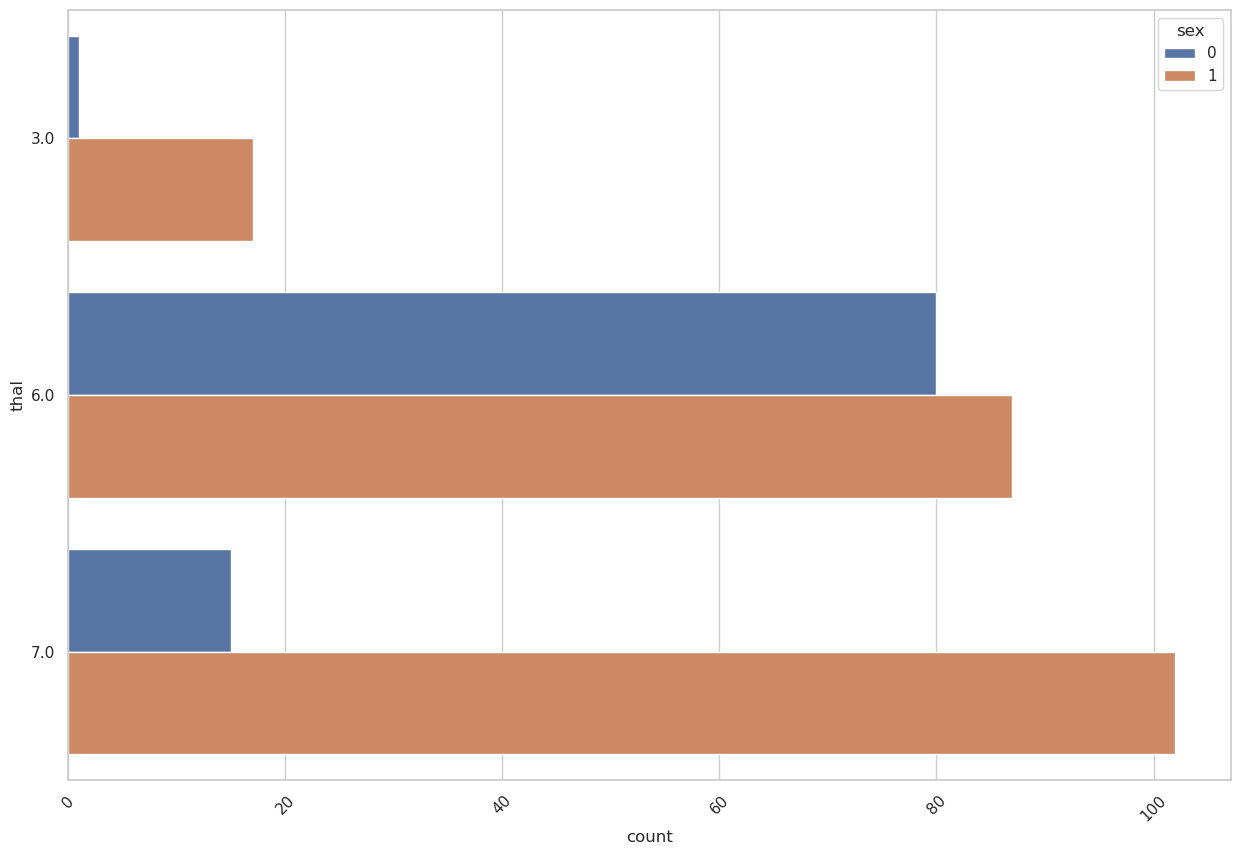

In [43]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
sns.countplot(data=categorical, y="thal",hue="sex")

<Axes: xlabel='count', ylabel='sex'>

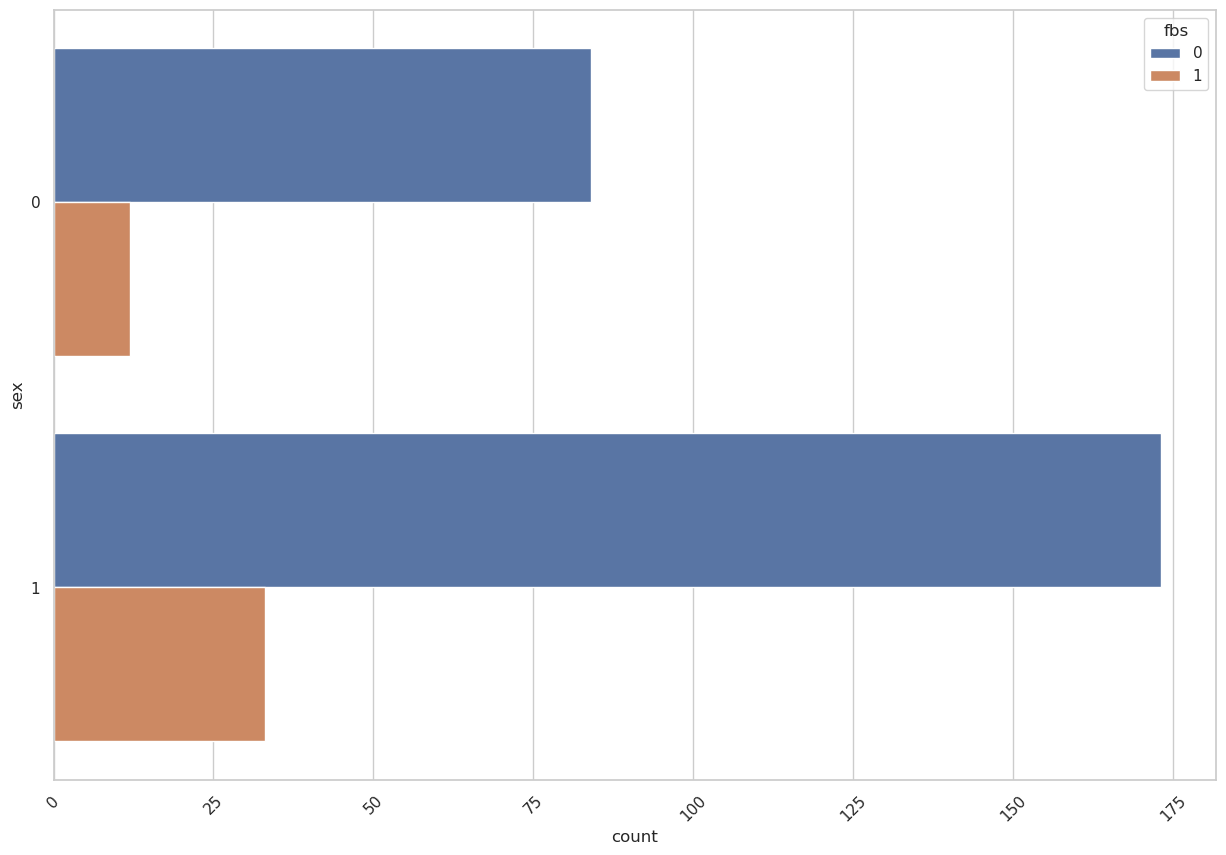

In [44]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
sns.countplot(data=categorical, y="sex",hue="fbs")

<Axes: xlabel='count', ylabel='sex'>

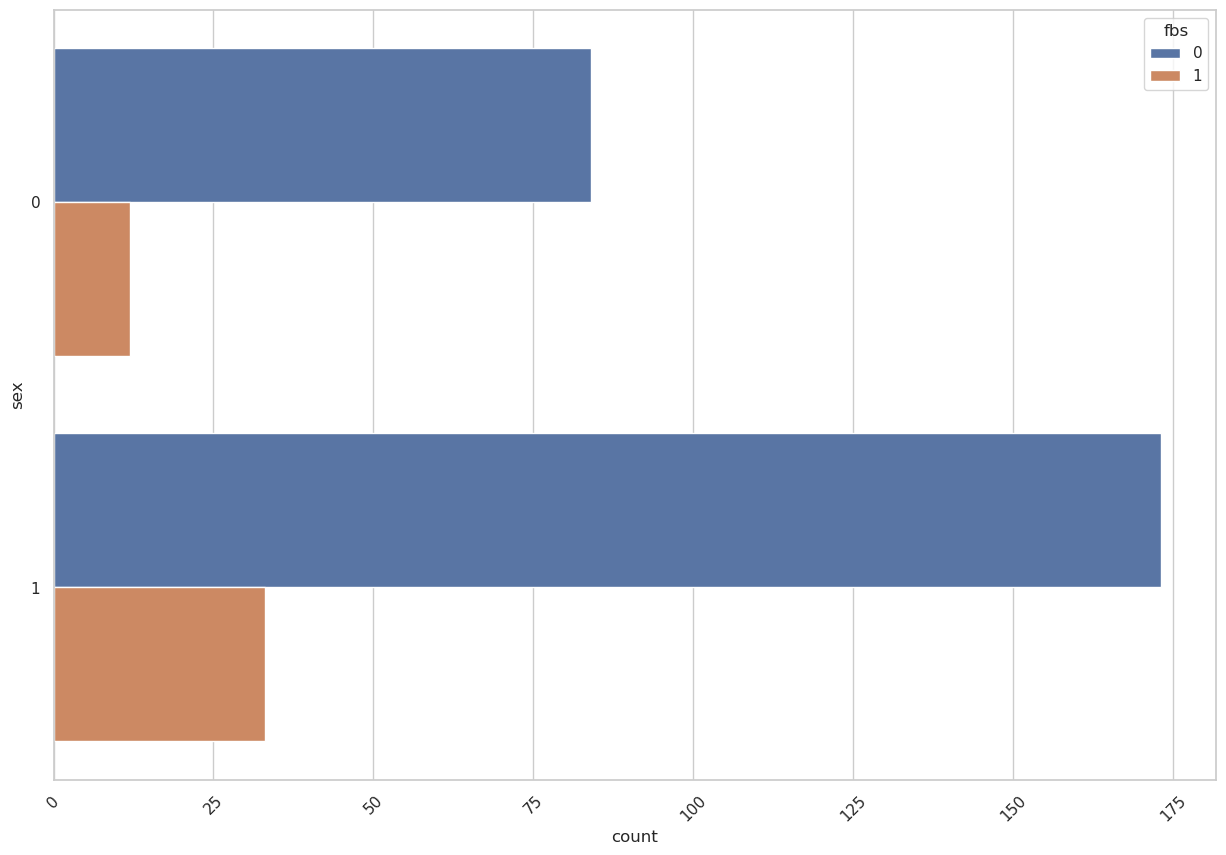

In [45]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
sns.countplot(data=categorical, y="sex",hue="fbs")

<Axes: xlabel='count', ylabel='sex'>

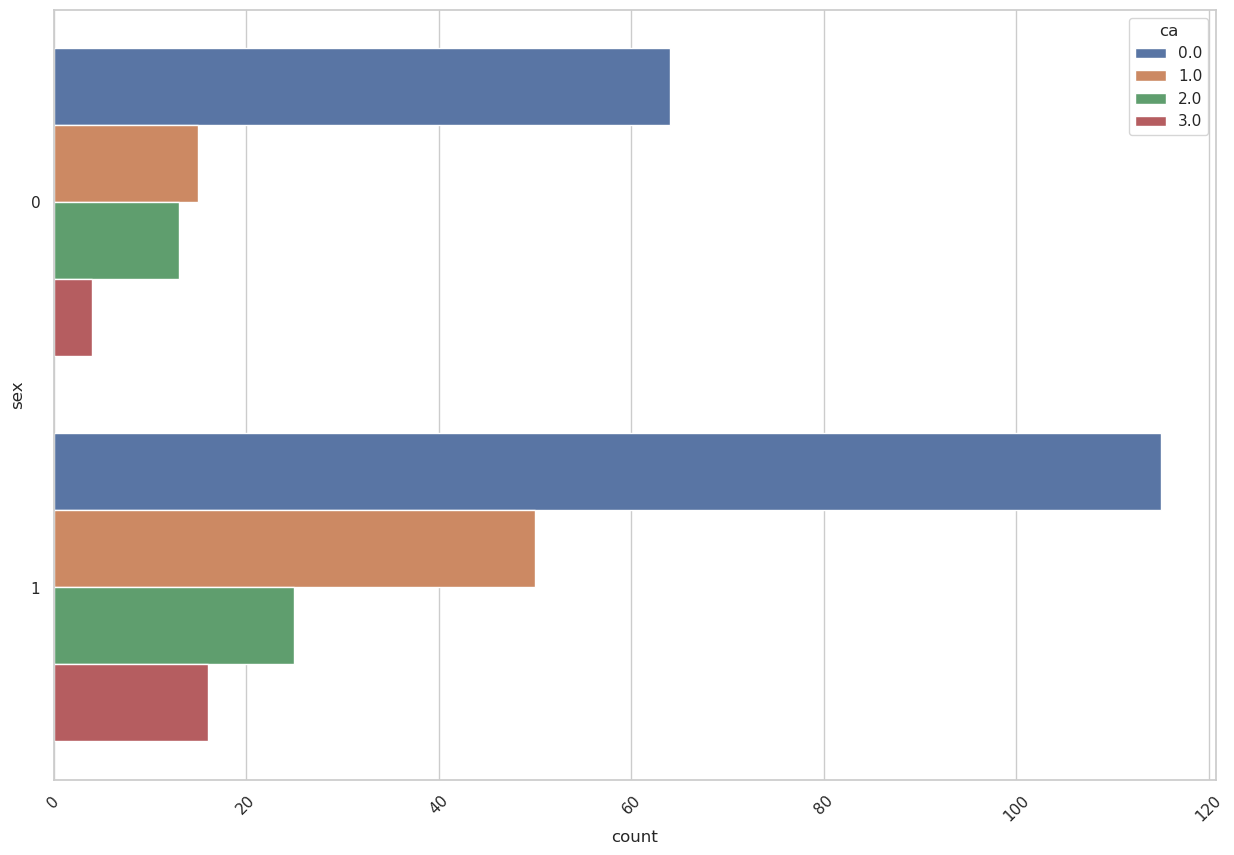

In [46]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
sns.countplot(data=categorical, y="sex",hue="ca")

<Axes: xlabel='count', ylabel='cp'>

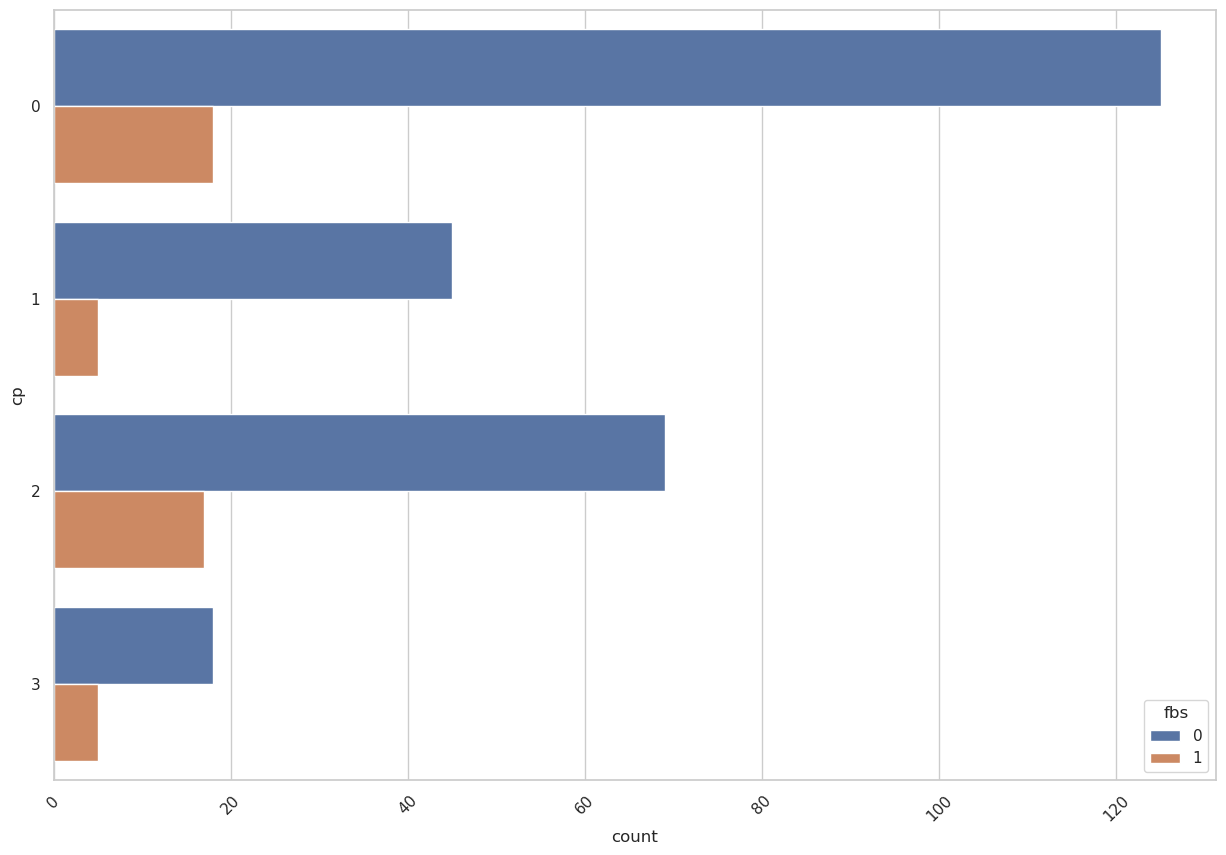

In [47]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
sns.countplot(data=categorical, y="cp",hue="fbs")

<Axes: xlabel='count', ylabel='cp'>

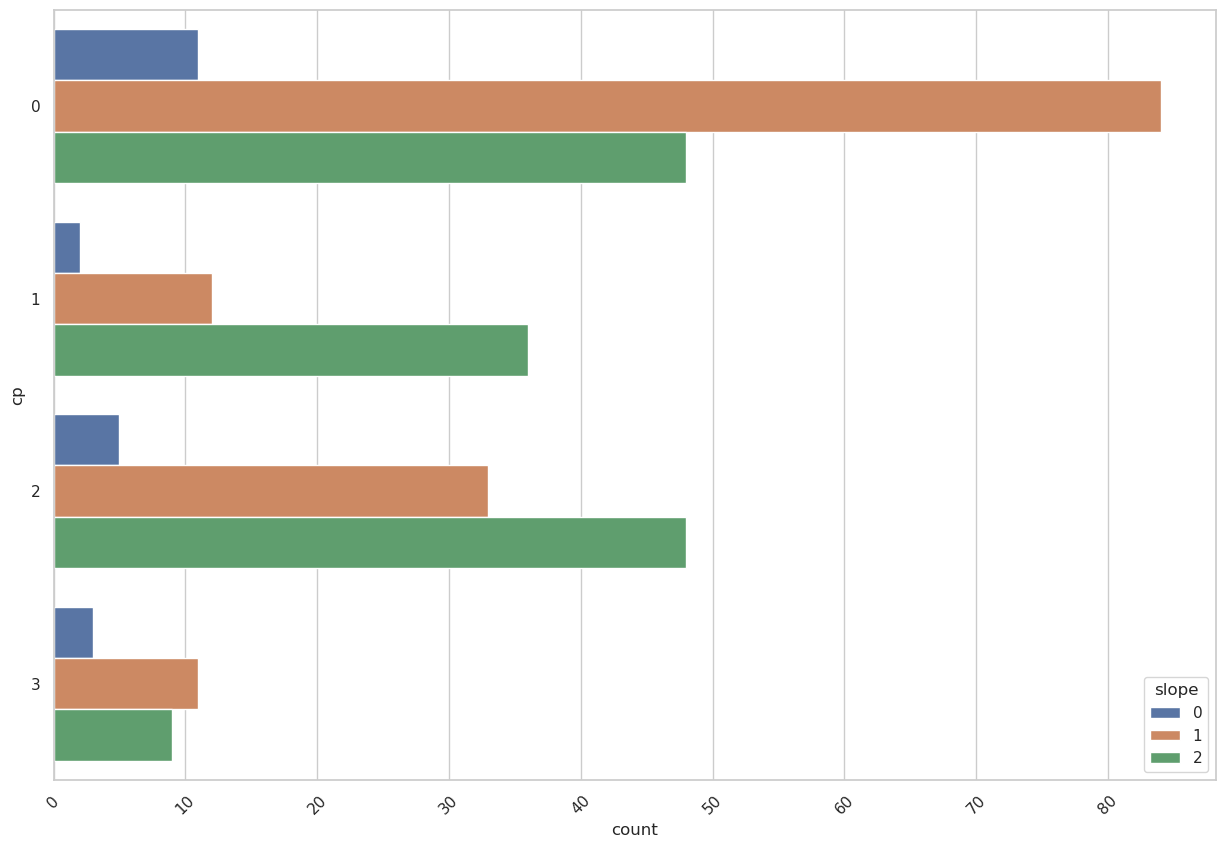

In [48]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
sns.countplot(data=categorical, y="cp",hue="slope")

<Axes: xlabel='count', ylabel='cp'>

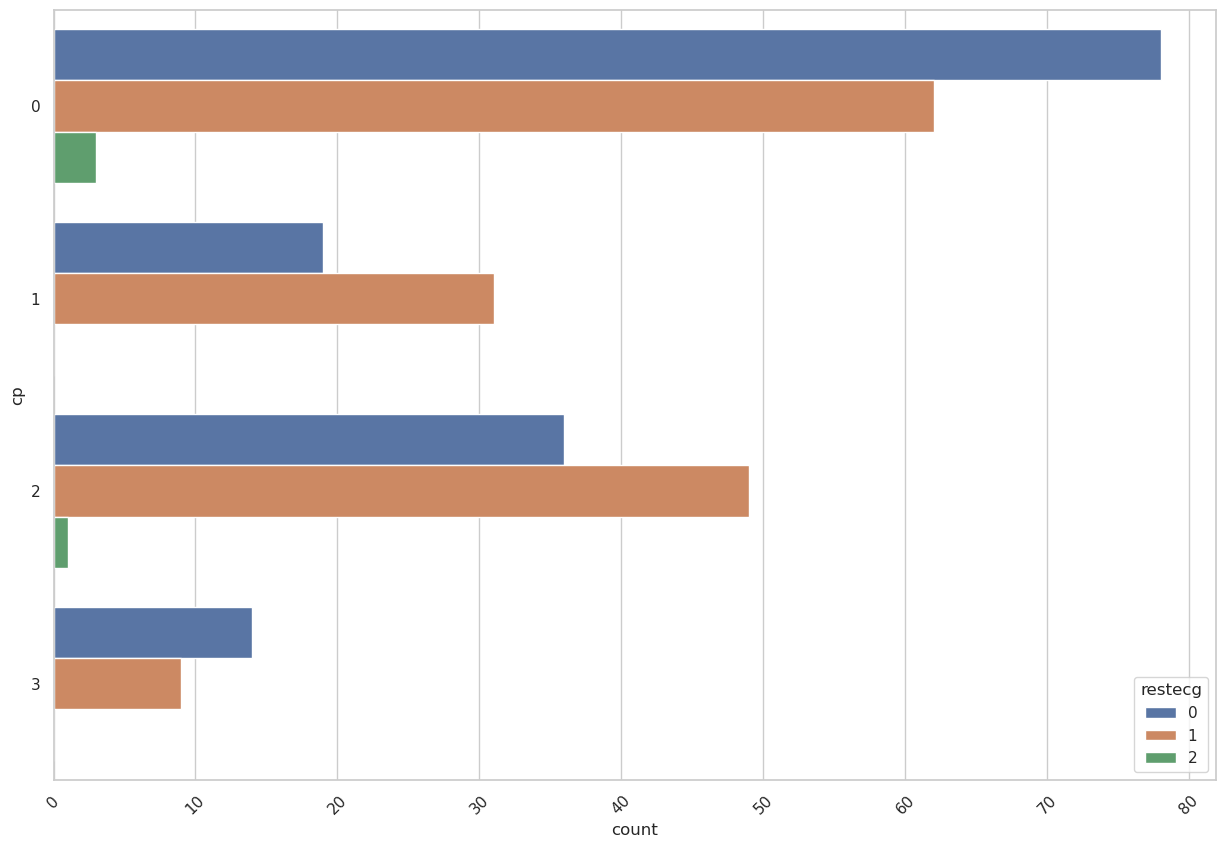

In [49]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
sns.countplot(data=categorical, y="cp",hue="restecg")

<Axes: xlabel='count', ylabel='fbs'>

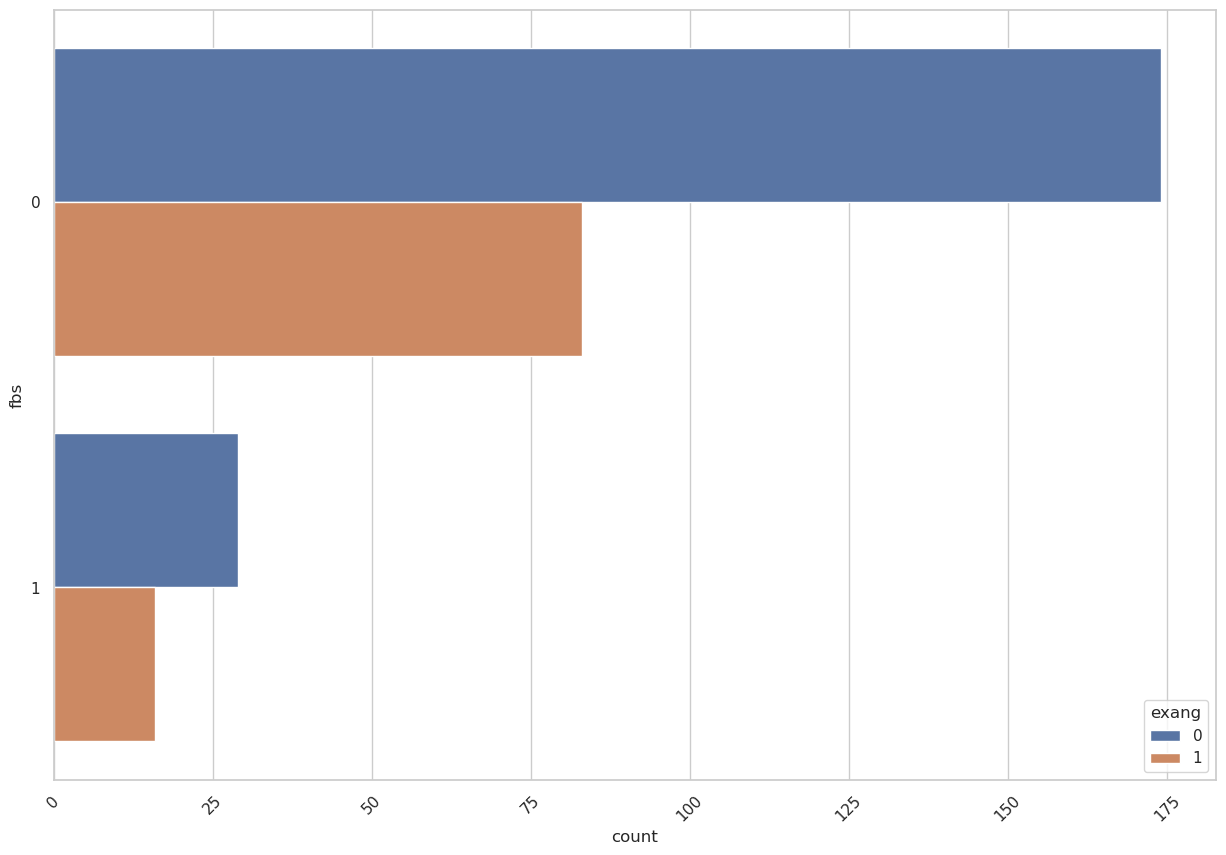

In [50]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
sns.countplot(data=categorical, y="fbs",hue="exang")

<Axes: xlabel='count', ylabel='fbs'>

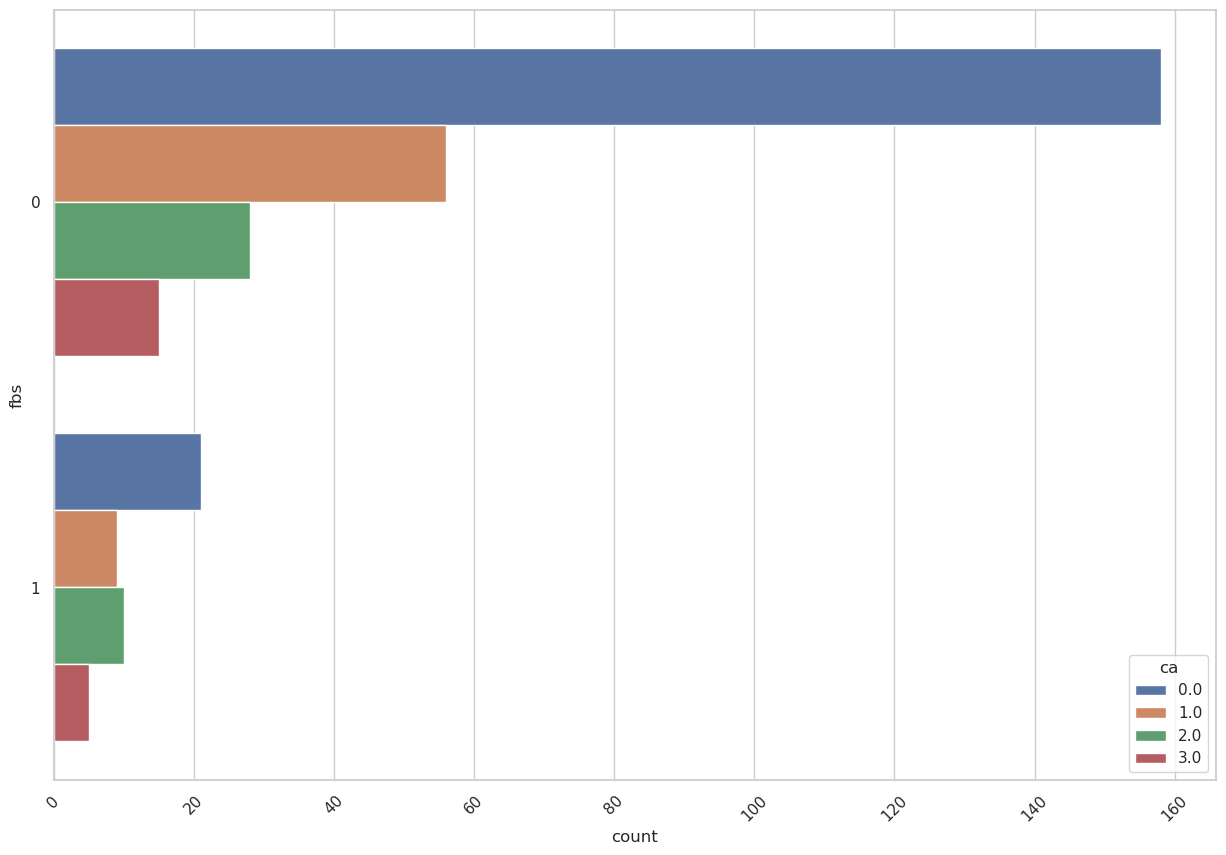

In [51]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
sns.countplot(data=categorical, y="fbs",hue="ca")

<Axes: xlabel='count', ylabel='fbs'>

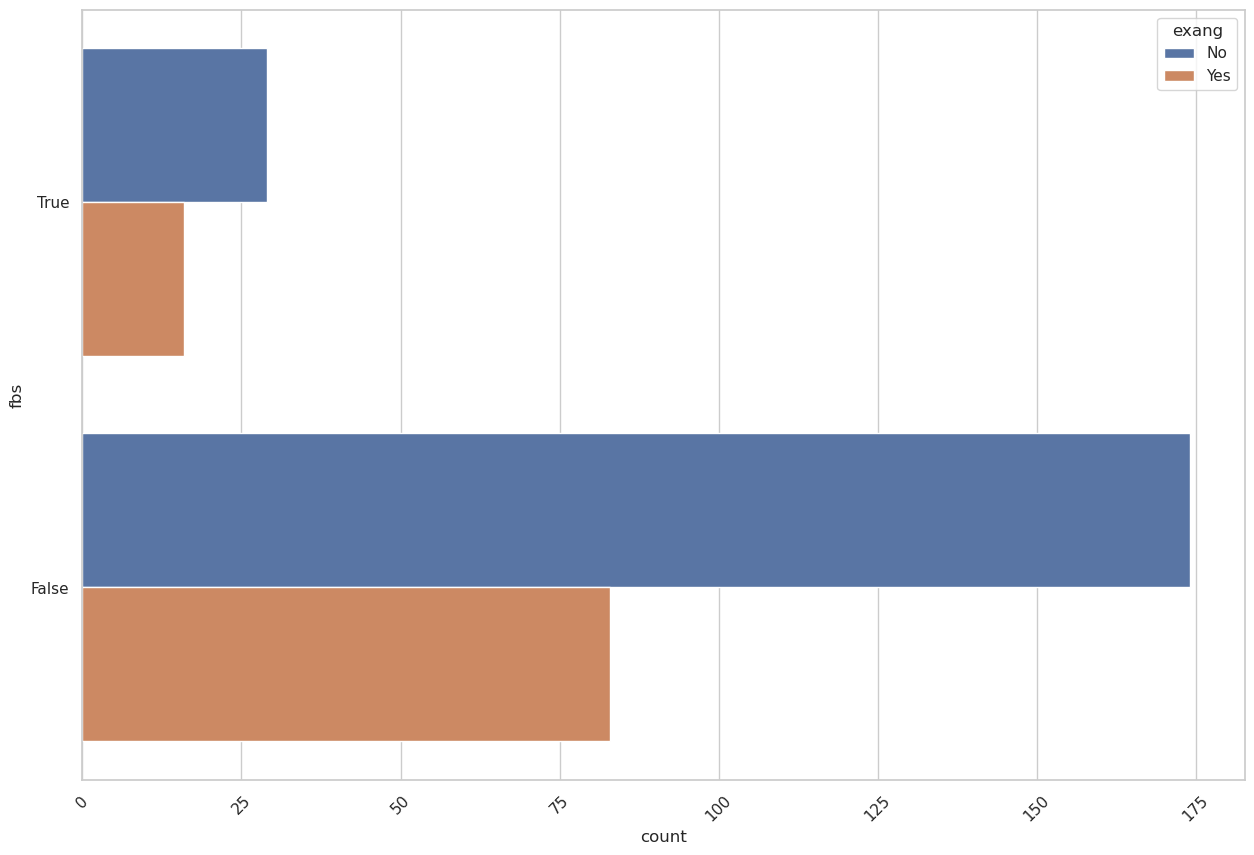

In [52]:
categorical['exang'] = categorical.exang.replace({1: "Yes", 0: "No"})
categorical['fbs'] = categorical.fbs.replace({1: "True", 0: "False"})
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
sns.countplot(data=categorical, y="fbs",hue="exang")

In [53]:
#Q 2 c. Study the occurrence of CVD across the Age category

In [54]:
#At first let's check the age distribution

Text(0.5, 1.0, 'Age Distribution')

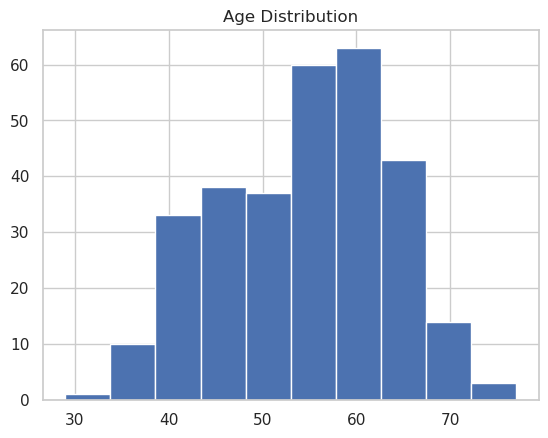

In [55]:
d2["age"].hist().plot(kind="bar")
plt.title("Age Distribution")
#It seems that the distribution is normal

In [ ]:
#Perhaps it would be better if we could take inot account the top 10 ages and the respective counts as well as the relevant distribution

In [56]:
print(d2.age.value_counts()[:10])

58    19
57    17
54    16
59    14
52    13
51    12
62    11
56    11
44    11
60    11
Name: age, dtype: int64


Text(0, 0.5, 'Age distribution')

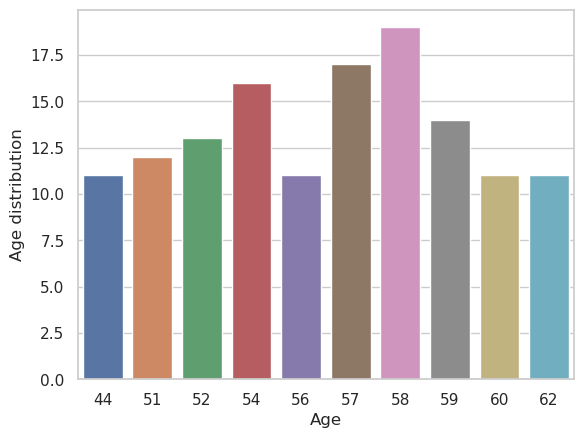

In [57]:
sns.barplot(x=d1.age.value_counts()[:10].index,
y=d1.age.value_counts()[:10].values)
plt.xlabel('Age')
plt.ylabel('Age distribution')

In [58]:
#We can do a more detailed analysis by checking the mean as well as the max and␣ min values of patients.

In [59]:
print(min(d1.age))
print(max(d1.age))
print(d1.age.mean())
#it seems that ages after/or 57 until 60 have higher frequency, age 58 has the highest frequency

29
77
54.420529801324506


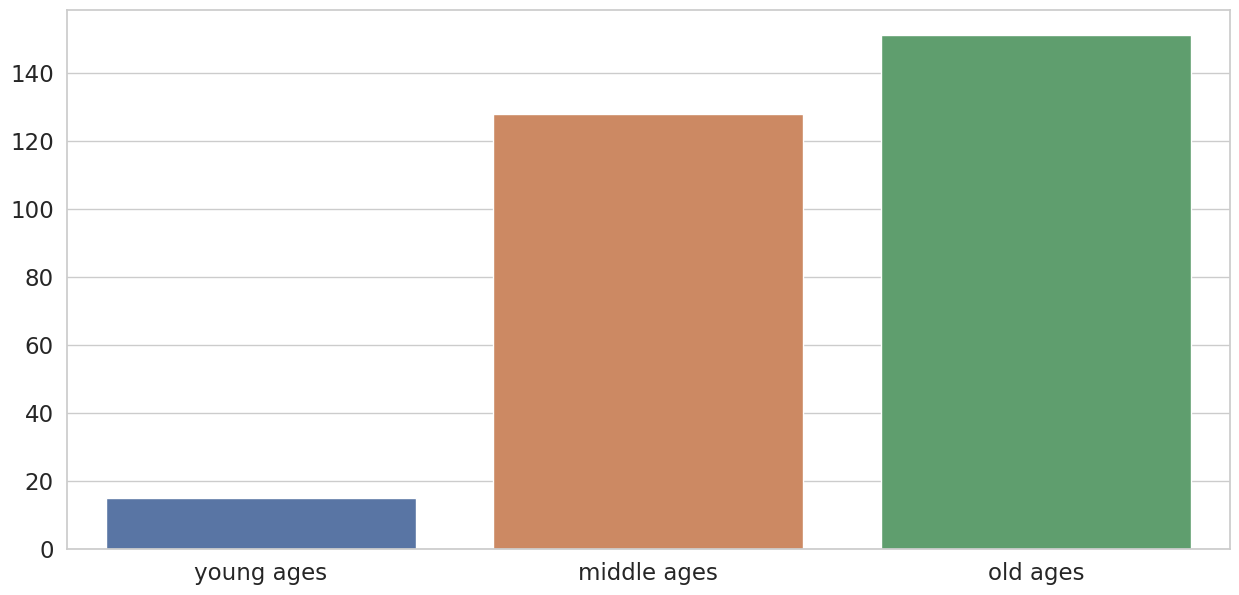

In [60]:
Young = d1[(d1.age>=29)&(d1.age<40)]
Middle = d1[(d1.age>=40)&(d1.age<55)]
Old = d1[(d1.age>55)]
plt.figure(figsize=(15,7))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=['young ages','middle ages','old ages'],y=[len(Young),len(Middle),len(Old)])
plt.show()


In [61]:
#It is obvious that the old ages are mainly affected, however we were advised to make pie charts for these cases of analysis

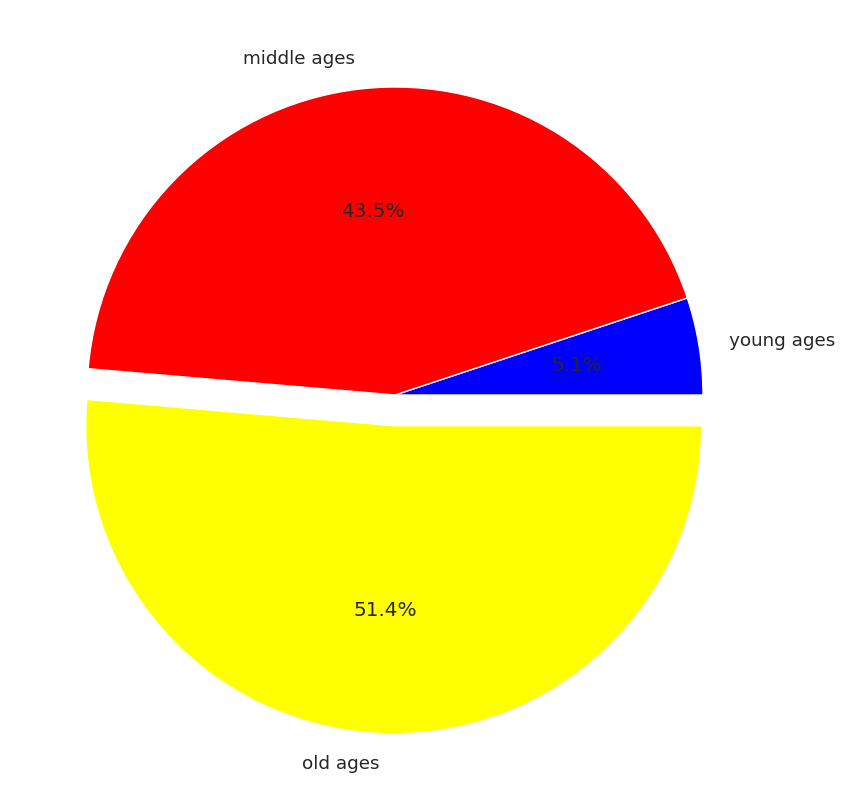

In [62]:
colors = ['blue','red','yellow']
explode = [0,0,0.1]
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Young),len(Middle),len(Old)],labels=['young ages','middle ages','old ages'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.show()

In [64]:
#Q2 d. Study the composition of all patients with respect to the Sex category

<Axes: xlabel='count', ylabel='sex'>

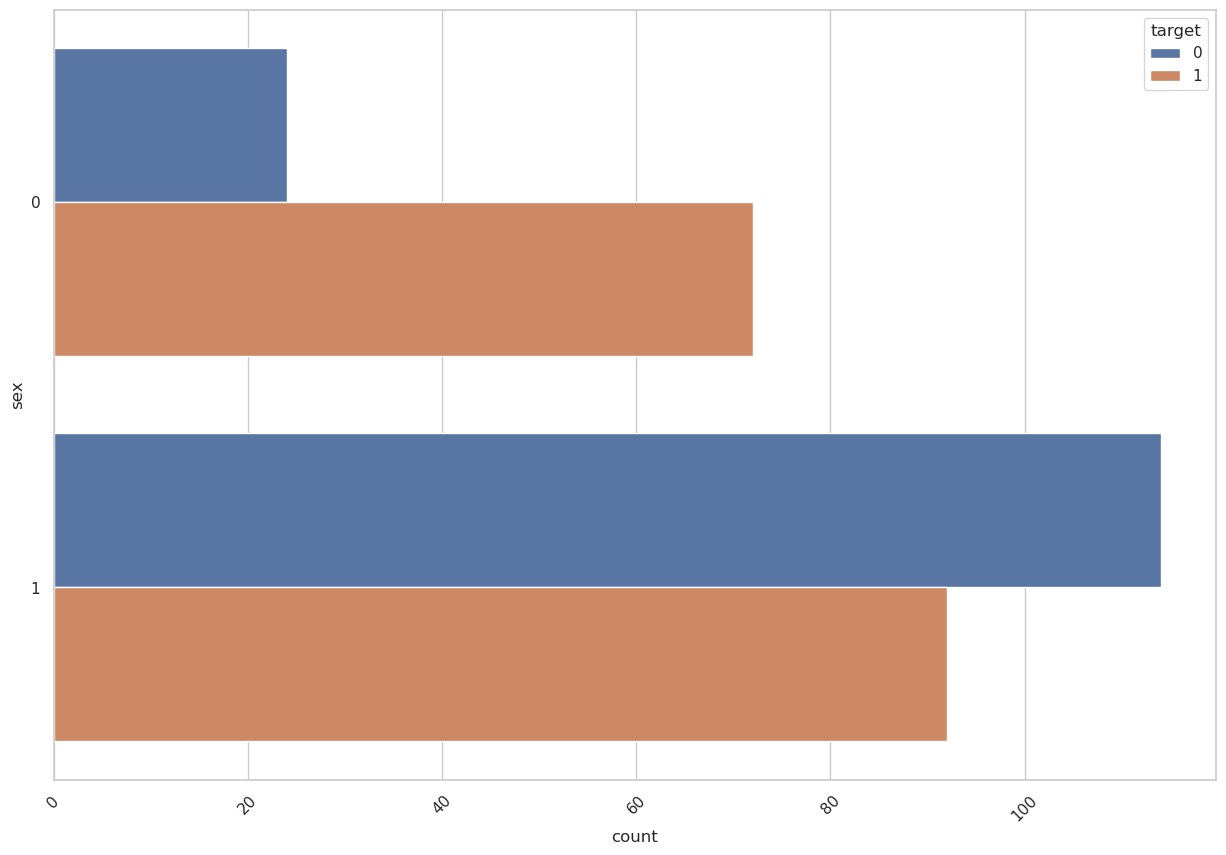

In [65]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
sns.countplot(data=d1, y="sex",hue="target")

In [66]:
#From the abovementioned data it is obvious tha male patients are more than␣
,!female patients

/bin/bash: -c: line 0: syntax error near unexpected token `"patients"'
/bin/bash: -c: line 0: `female("patients")'


In [67]:
#Q2 e. Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient

<Axes: xlabel='count', ylabel='trestbps'>

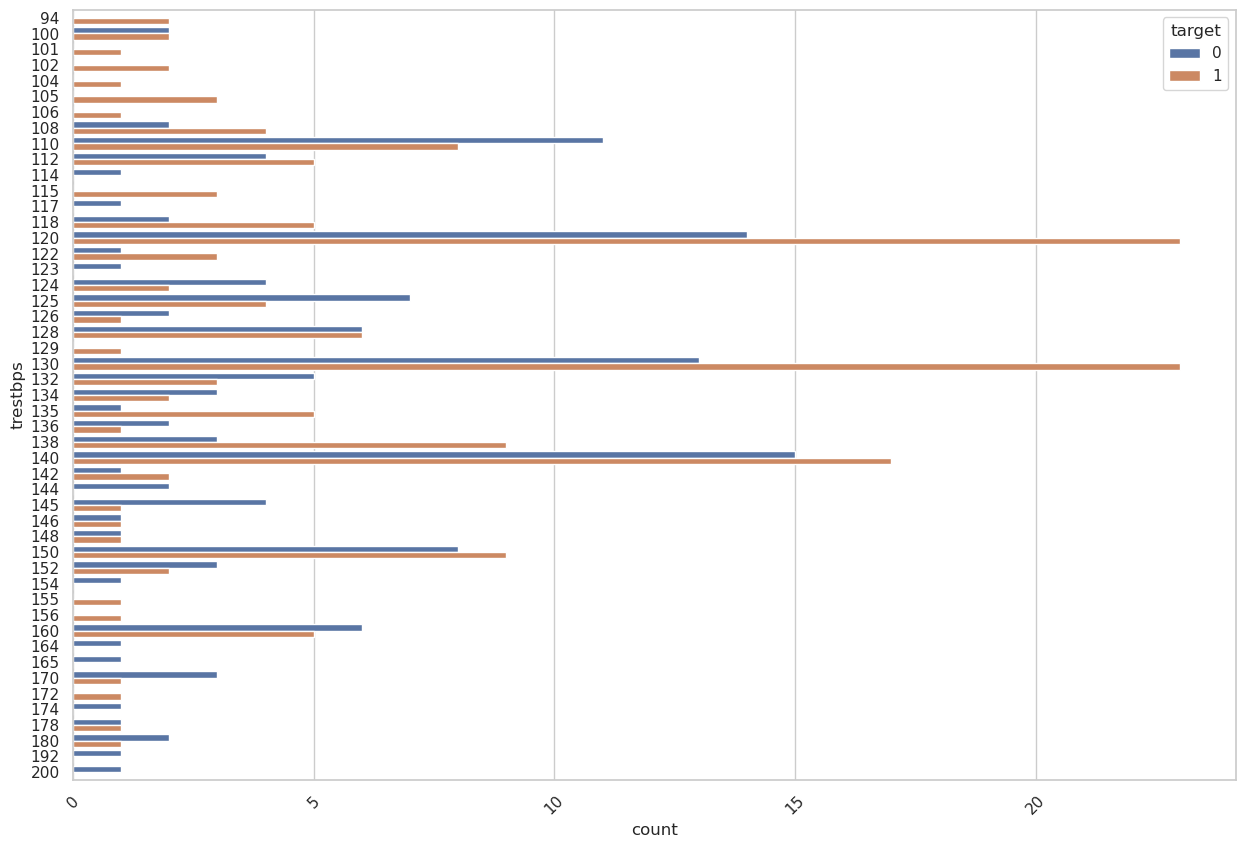

In [68]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
sns.countplot(data=d1, y="trestbps",hue="target")

In [69]:
#No we can't use this as a precition factor because even the no patients (target 0) have variations like the patients (target 1)
#it looks like they follow normal distribution

In [70]:
#Q2 f. Describe the relationship between cholesterol levels and a target variable

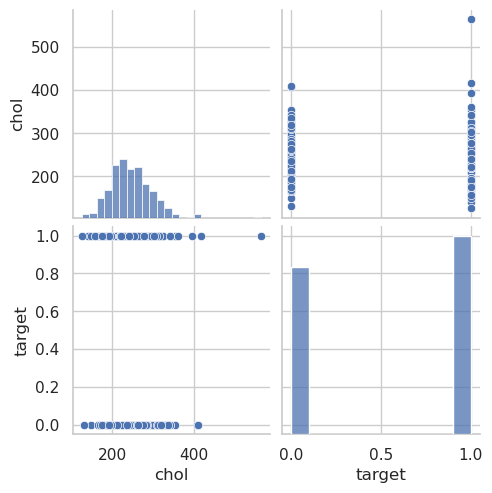

In [71]:
choltarget=["chol","target"]
sns.pairplot(d1[choltarget])

In [72]:
#cholesterol levels slightly higher form patients (it looks like outliers but is still data that we should not discard)
#Though the difference do not think is significant

Text(0, 0.5, 'Cholesterol levels')

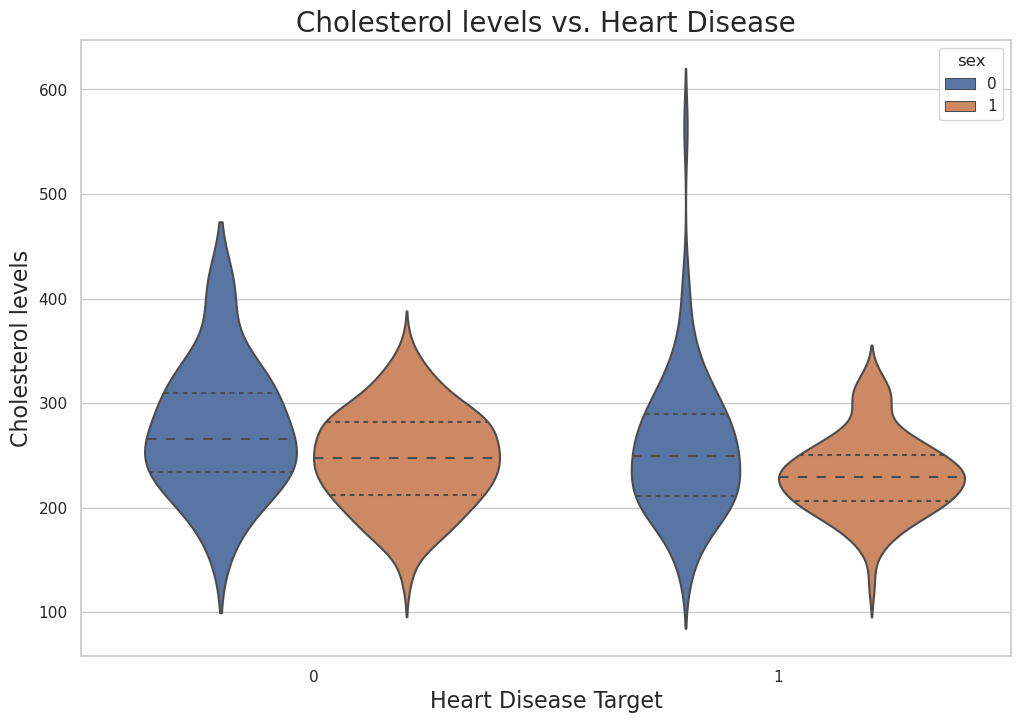

In [73]:
plt.figure(figsize=(12,8))
sns.violinplot(x= 'target', y= 'chol',hue="sex", inner='quartile',data= d1 )
plt.title("Cholesterol levels vs. Heart Disease",fontsize=20)
plt.xlabel("Heart Disease Target", fontsize=16)
plt.ylabel("Cholesterol levels", fontsize=16)

In [75]:
#Q2 g. State what relationship exists between peak exercising and the occurrence of a heart attack

In [76]:
#Q2 h. Check if thalassemia is a major cause of CVD

<Axes: xlabel='count', ylabel='thal'>

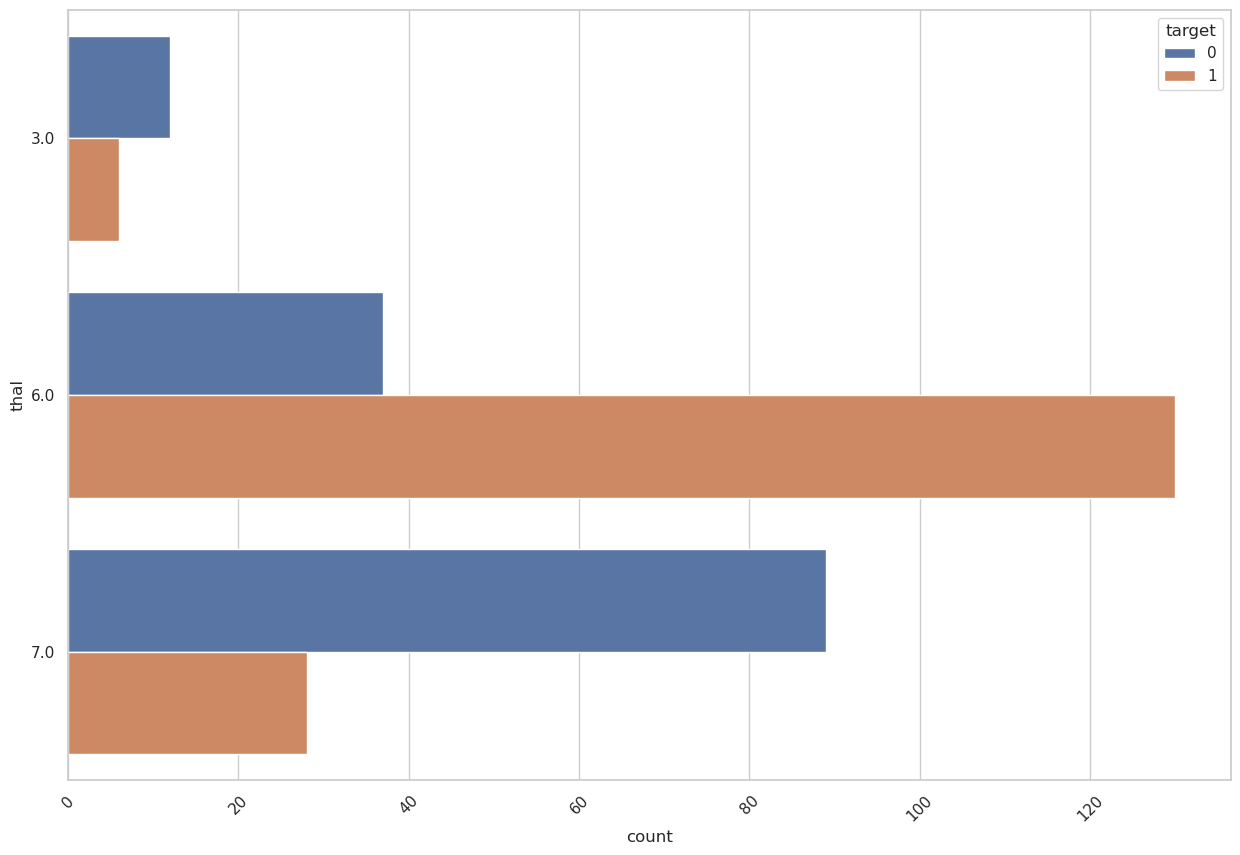

In [77]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
sns.countplot(data=d1, y="thal",hue="target")

In [78]:
#thal seems to be important for cvd, but not very clear as main cause!

In [79]:
#Q2 i. List how the other factors determine the occurrence of CVD

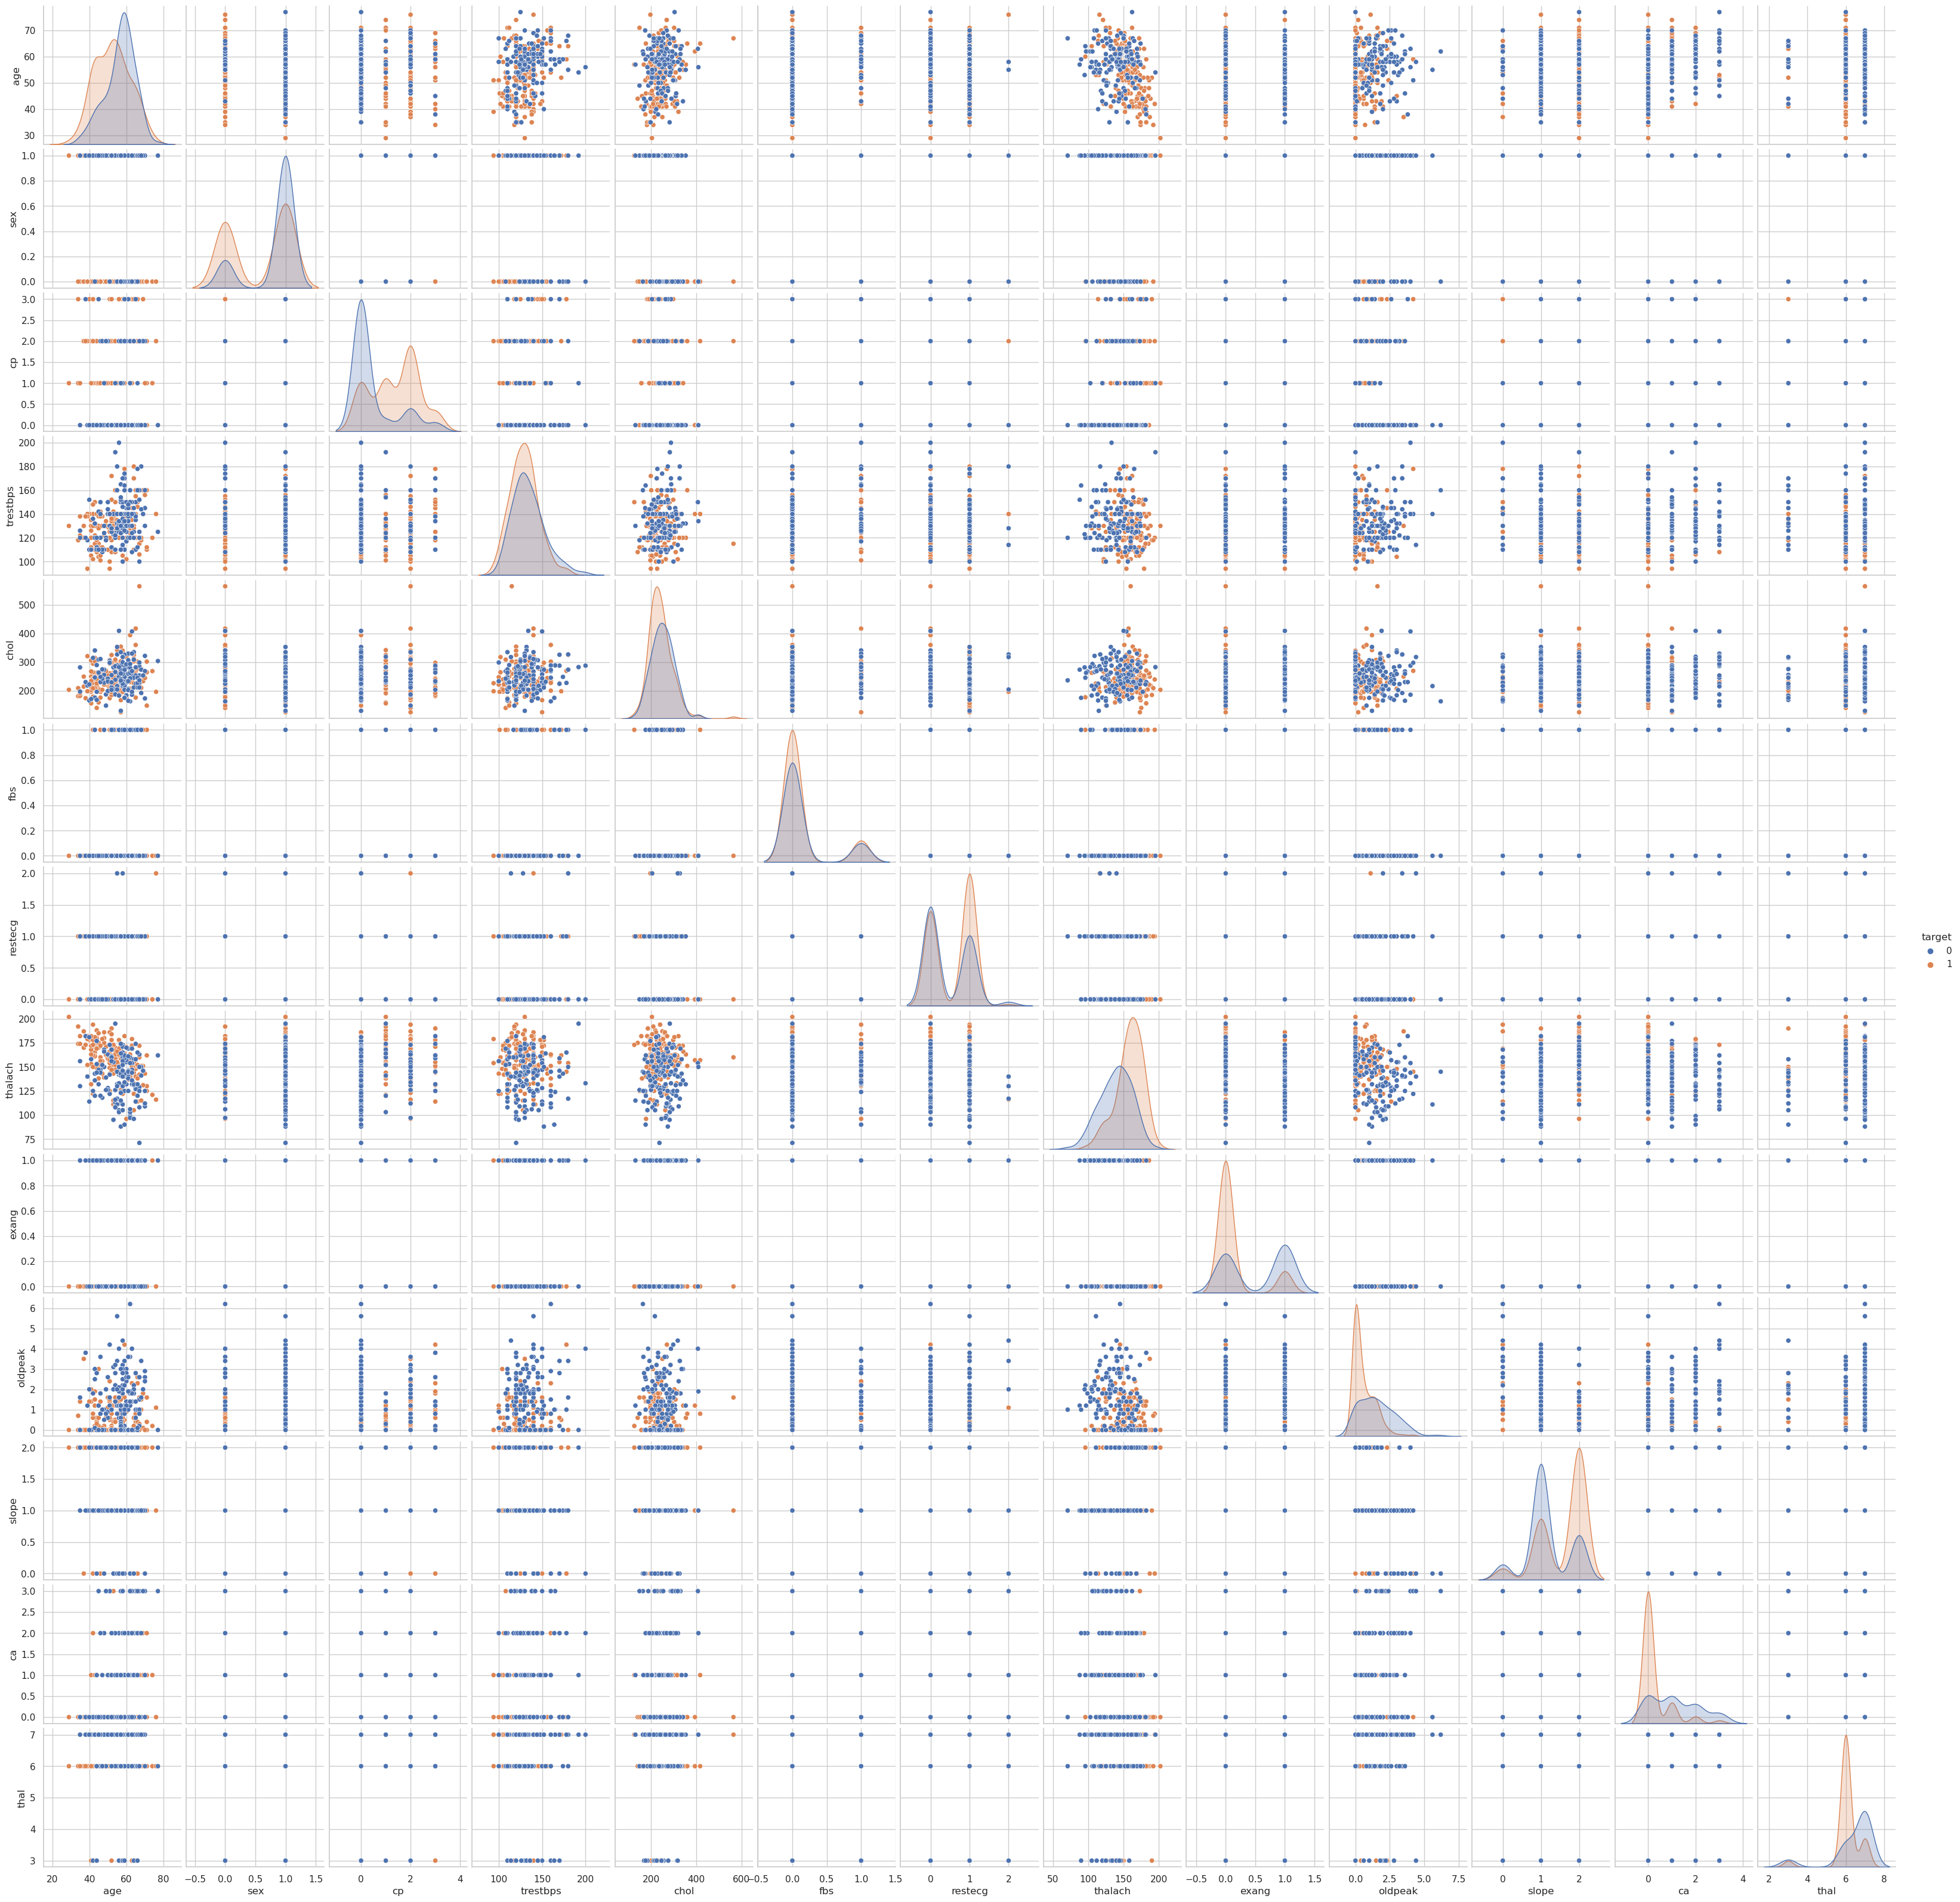

In [80]:
sns.pairplot(d1, hue="target")

In [81]:
#Q2j. Use a pair plot to understand the relationship between all the given variables

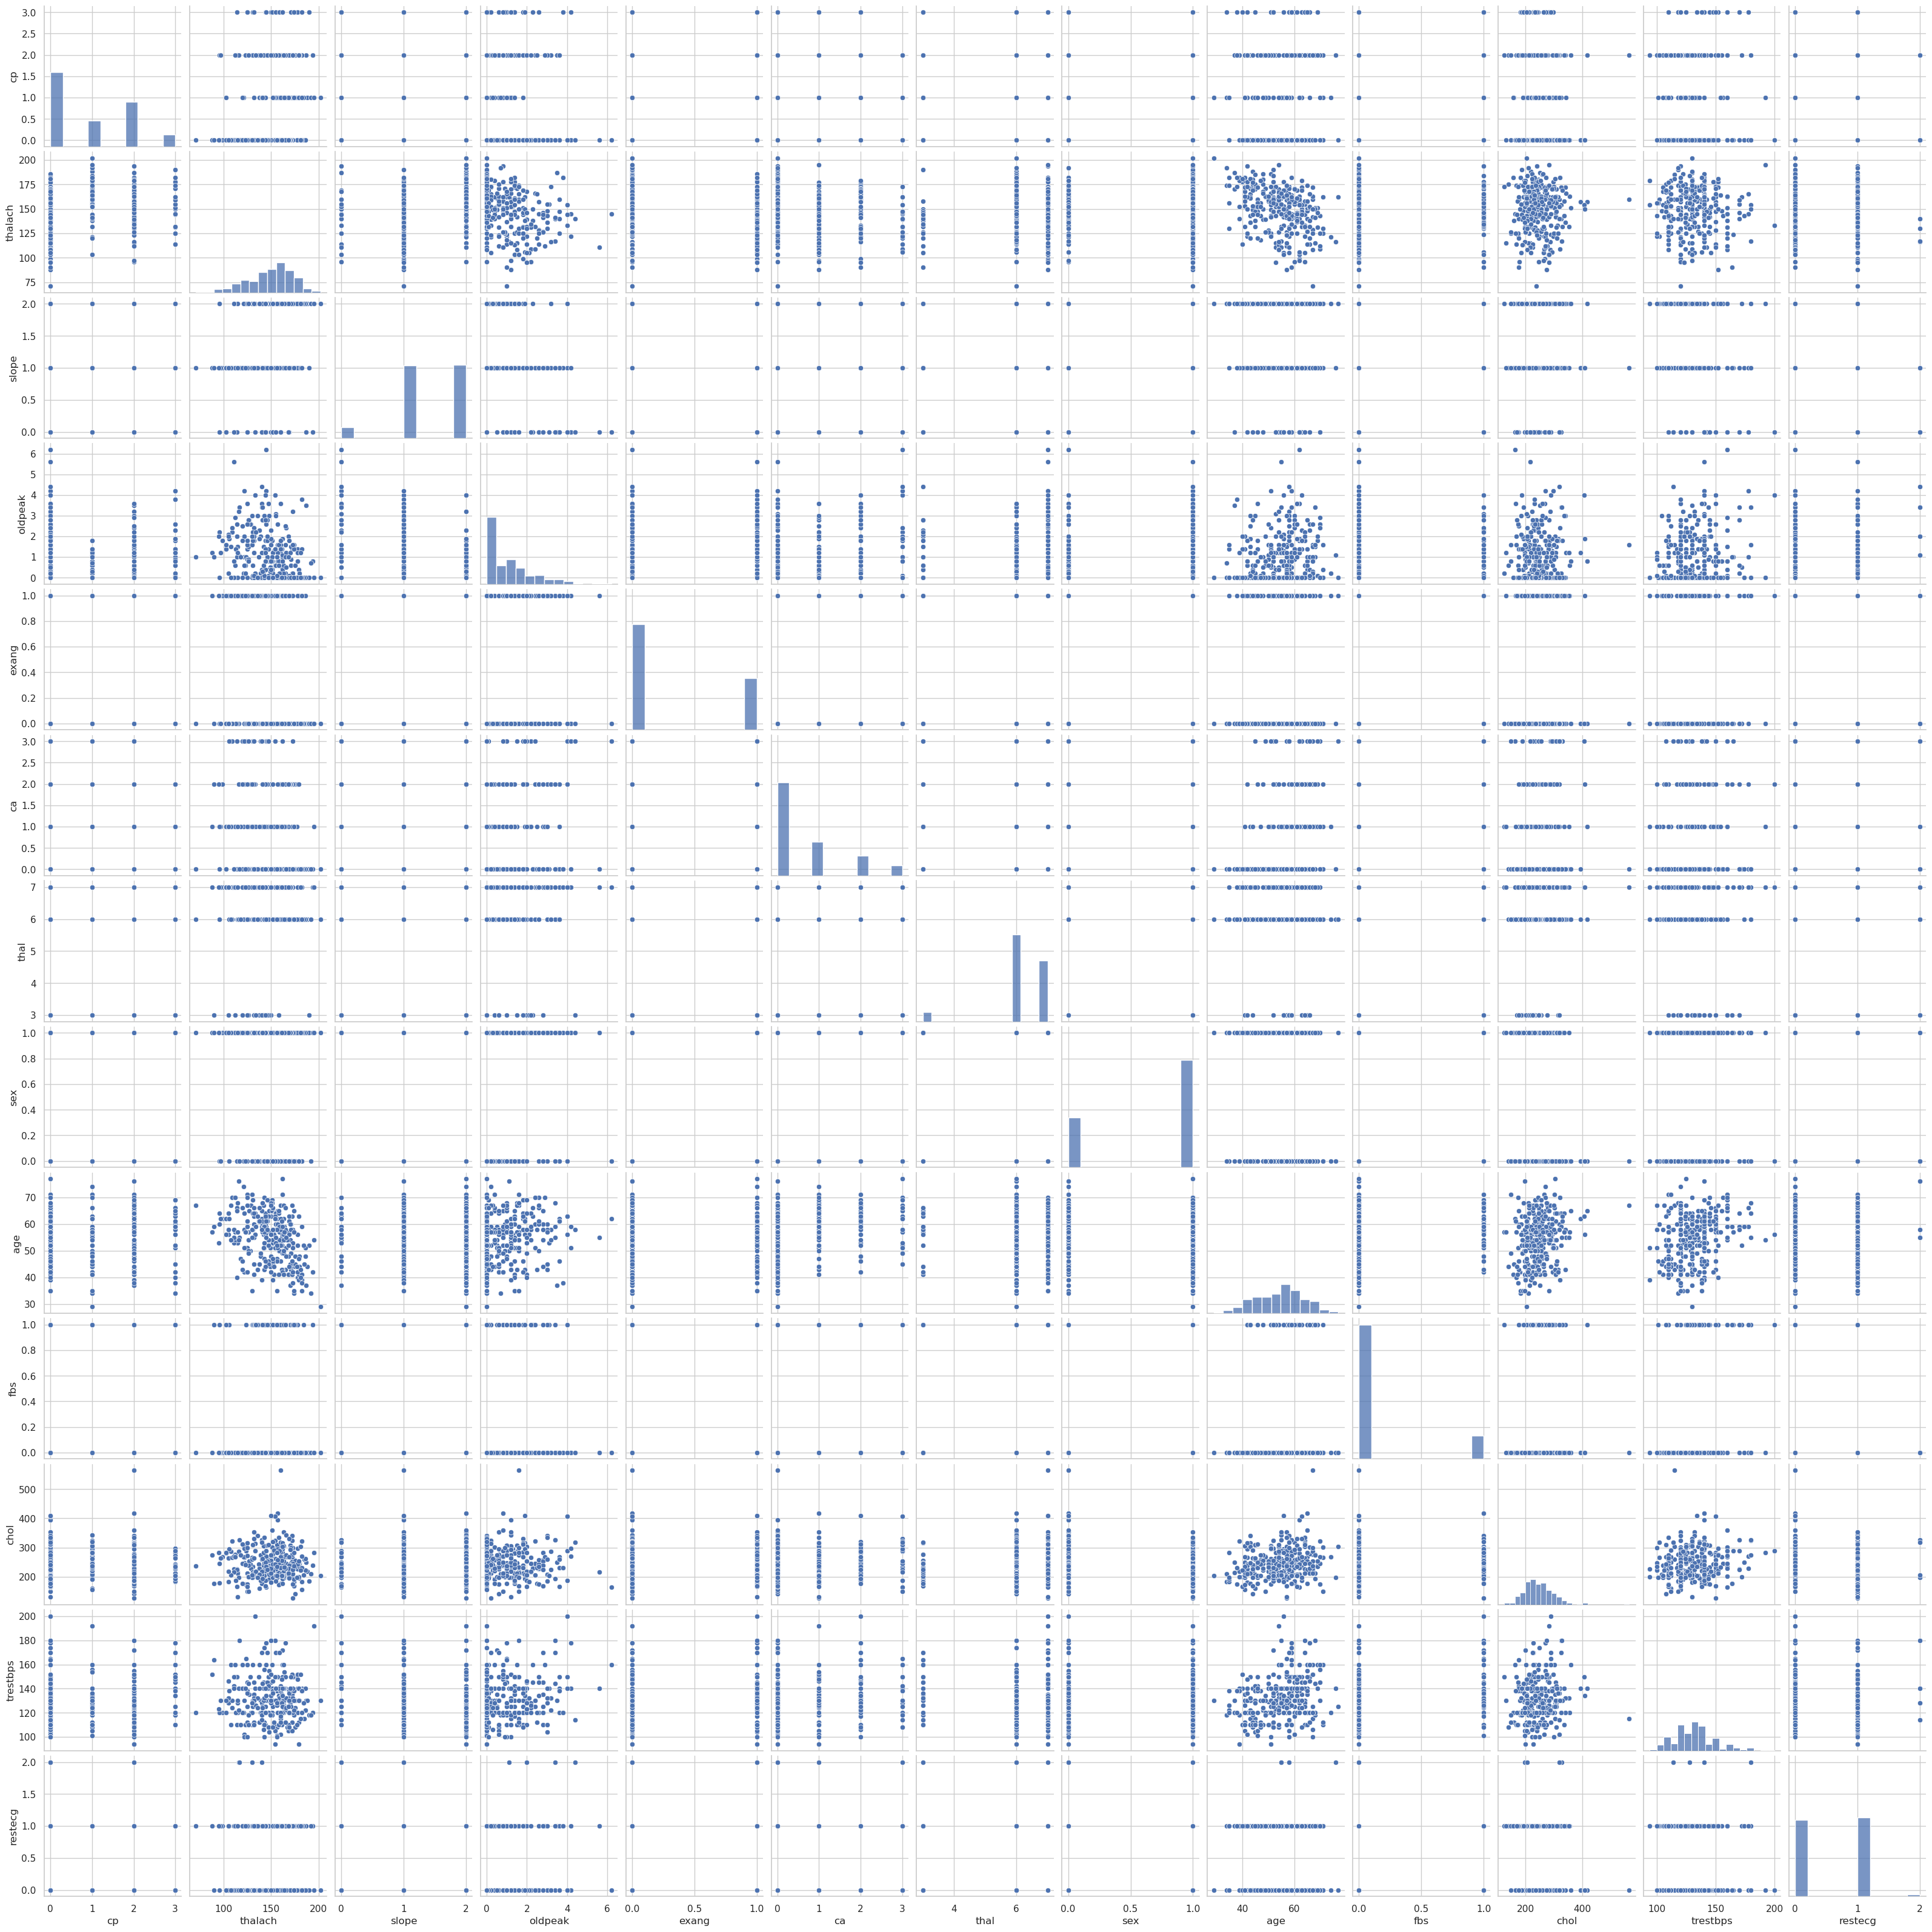

In [82]:
allvar=['cp', 'thalach', 'slope','oldpeak', 'exang', 'ca', 'thal', 'sex','age','fbs', 'chol', 'trestbps', 'restecg']
sns.pairplot(d1[allvar])

In [83]:
#Q3. Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and
#explore the results while using correlation analysis and logistic regression
# (leveraging standard error and p-values from statsmodels) for feature selection
#Initially we need to identify the target and separate it from the x variables
#Furthermore since we talk about a patient and no patient (target 0 or 1) we have a binary system -->Classification

In [84]:
X = d1.iloc[:, :-1].values
y = d1.iloc[:, -1].values

In [85]:
#Data needs to be splited into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=1)
#so in that case in order to apply a model we need to normalie the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [86]:
## Logistic Regression
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
modelLR = LogisticRegression(random_state=1)
modelLR.fit(X_train, y_train)
y_predLR = modelLR.predict(X_test)
print(classification_report(y_test, y_predLR))
#accuracy 0.82

              precision    recall  f1-score   support

           0       0.88      0.72      0.79        29
           1       0.78      0.91      0.84        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



In [87]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_predLR)
print(cm)
accuracy_score(y_test, y_predLR)

[[21  8]
 [ 3 29]]


0.819672131147541

In [88]:
#21 True posivites, 29 true negatives
#8 false positives, 3 false negatives

In [89]:
# Random Forest
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
modelRF = RandomForestClassifier(random_state=1)
modelRF.fit(X_train, y_train)
y_predRF = modelRF.predict(X_test)
print(classification_report(y_test, y_predRF))
#Random forest is preferable
#aacuracy -->0,82

              precision    recall  f1-score   support

           0       0.85      0.76      0.80        29
           1       0.80      0.88      0.84        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [90]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_predRF)
print(cm)
accuracy_score(y_test, y_predRF)

[[22  7]
 [ 4 28]]


0.819672131147541

In [91]:
#22 True positives, 28 True negatives,
# 7 false positives 4 false negatives
#RMSE is not a metric for classification algorithms
#I think with the EDA analysis it seems that both models have similar accuracy score

In [101]:
# get importance in Random forest model
importance = modelRF.feature_importances_


for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))


Feature: 0, Score: 0.08203
Feature: 1, Score: 0.03347
Feature: 2, Score: 0.15978
Feature: 3, Score: 0.08006
Feature: 4, Score: 0.07693
Feature: 5, Score: 0.01096
Feature: 6, Score: 0.01765
Feature: 7, Score: 0.12019
Feature: 8, Score: 0.06019
Feature: 9, Score: 0.08956
Feature: 10, Score: 0.05339
Feature: 11, Score: 0.11814
Feature: 12, Score: 0.09765


<Axes: >

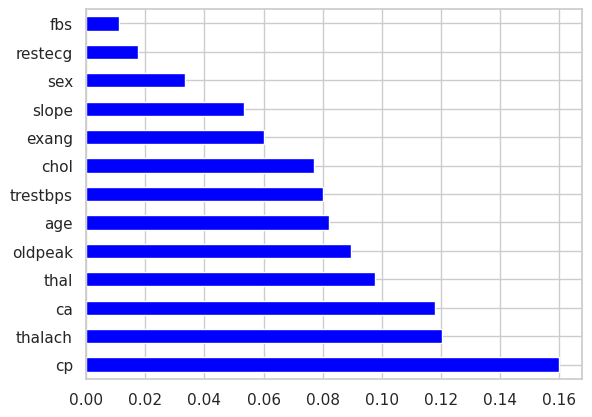

In [99]:
index= d1.columns[:-1]
importance = pd.Series(modelRF.feature_importances_, index=index)
importance.nlargest(13).plot(kind='barh', colormap='winter')